# INDENG 243 Project - Module 2

# Bitcoin Price Prediction Analysis

## 1. Project Introduction

**Background Information:** Bitcoin (BTC) is the first decentralized cryptocurrency. It is a digital or virtual currency created in 2009 that uses peer-to-peer technology to facilitate instant payments. In other words, bitcoin is a form of digital currency that uses blockchain technology to support transactions between users on a decentralized network. Bitcoin is valuable because it has all the essential properties of paper money: acceptability, divisibility, durability, fungibility (interchangeability), portability, and scarcity.

**Importance of Bitcoin Price Analysis:** Analyzing Bitcoin's price holds significant importance given its status as a prominent investment vehicle and its impact on the broader cryptocurrency market. Investors rely on such analysis to make well-informed decisions and mitigate risks, while traders closely observe it to assess market sentiment. Moreover, businesses that accept Bitcoin must carefully factor in its volatility when determining pricing strategies and managing associated risks. Policymakers and researchers also closely examine Bitcoin's price fluctuations, seeking insights into financial stability and regulatory implications. As the trailblazer in the realm of cryptocurrencies, Bitcoin's price trends ripple throughout the entire digital asset sphere. Consequently, comprehending these price movements becomes imperative for various stakeholders to navigate the dynamic landscape of cryptocurrencies adeptly.

**Purpose of Project:** This project aims to analyze bitcoin price performance, trends in the market and make price predictions that can provide valuable insights for investors, traders, policymakers, and other stakeholders.


## 2. Data Collection and Cleansing

### 2.1 Data Collection

We scrape the bitcoin's relevant data directly from **google trends website** and **YFinance API** for our analysis. There are two crawled dataset.

- **Keywords Dataset:** We select 26 relevant keywords with bitcoin. The dataset reflects the users' searching frequency daily from 2022.
  - 26 Keywords:  Bitcoin, BTC, BIT, Bitcoin Price, Digital Currency, Altcoin, Blockchain, Block, Crypto, Cryptography, Cryptocurrency, DeFi, DAPP, Ethereum, Bitcoin Mining, Bitcoin Wallet, Bitcoin News, Bitcoin Address, Bitcoin Investment, Fiat money, Fork, Stablecoin, ICO, Private Key, Hash Rate, P2P

- **Bitcoin Price Dataset:** Daily bitcoin prices information from 2014.
  - Open: Open price at start time window
  - High: High price within time window
  - Low: Low price within time window
  - Close: Close price at end of time window
  - Volume: Volume of BTC transacted in this window

Please see ***Keywords_crawler.ipynb*** in the folder for detailed code of Keywords Dataset. 

Please see ***Prices_crawler.ipynb*** in the folder for detailed code of Bitcoin Price Dataset.

### 2.2 Data Cleansing

In [1]:
# Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
from datetime import datetime, timedelta
import plotly.graph_objs as go
from plotly.subplots import make_subplots

#### 2.2.1 Clean Keywords Dataset

- **1) We firstly normalize data in the process of crawler.** See the ***Keywords_crawler.ipynb*** in the folder for detailed code.

In [2]:
# Retrive datasets from Github 
url_word_trends = 'https://raw.githubusercontent.com/lichang0824/bitcoin-VAR-GoogleTrends/main/Daily/trends.csv'
response = requests.get(url_word_trends)
word_trends_data = StringIO(response.text)
df_word_trends = pd.read_csv(word_trends_data)

In [3]:
# Show the initial dataset information and first five rows.
df_word_trends.info()
df_word_trends.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          760 non-null    int64  
 1   Altcoin             760 non-null    float64
 2   BIT                 760 non-null    float64
 3   Bitcoin Address     760 non-null    float64
 4   Bitcoin Investment  760 non-null    float64
 5   Bitcoin Mining      760 non-null    float64
 6   Bitcoin News        760 non-null    float64
 7   Bitcoin Price       760 non-null    float64
 8   Bitcoin Wallet      760 non-null    float64
 9   Bitcoin             759 non-null    float64
 10  Block               760 non-null    float64
 11  Blockchain          760 non-null    float64
 12  BTC                 760 non-null    float64
 13  Crypto              760 non-null    float64
 14  Cryptocurrency      760 non-null    float64
 15  Cryptography        760 non-null    float64
 16  DAPP    

,Unnamed: 0,Altcoin,BIT,Bitcoin Address,Bitcoin Investment,Bitcoin Mining,Bitcoin News,Bitcoin Price,Bitcoin Wallet,Bitcoin,...,DeFi,Digital Currency,Ethereum,Fiat money,Fork,Hash Rate,ICO,P2P,Private Key,Stablecoin
0,1,55.0,56.44,98.00,65.0,26.01,8.26,8.36,43.66,12.25,...,0.0,3.8,40.32,27.72,33.81,76.0,52.08,38.7,30.75,13.26
1,2,55.0,53.95,27.44,64.0,21.93,17.11,9.68,24.42,14.70,...,0.0,3.1,42.24,32.76,38.22,69.0,61.38,54.0,32.25,16.90
2,3,55.0,76.36,42.14,75.0,33.66,24.19,13.20,20.72,20.58,...,0.0,3.8,58.56,28.56,46.55,41.0,93.00,81.0,70.50,24.44
3,4,99.0,67.23,48.02,80.0,33.66,34.22,13.64,25.90,21.56,...,0.0,3.0,61.44,33.18,49.00,52.0,75.33,76.5,60.00,22.88
4,5,100.0,61.42,36.26,57.0,32.64,36.58,18.48,27.38,24.99,...,0.0,5.7,64.32,25.20,34.30,54.0,53.94,58.5,51.00,19.76


- **2)** Since we already know that the data starts from **January 1st, 2022**, we will rename the first column and change its value to datatime type.

In [4]:
# Make definitions
start_date = datetime(2022, 1, 1)  
number_of_days = df_word_trends.shape[0]  # Number of rows in the dataframe
date_range = [start_date + timedelta(days=x) for x in range(number_of_days)]

In [5]:
# Rename the first column and change its values to the date range
df_word_trends['Unnamed: 0'] = date_range
df_word_trends.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Convert the 'Date' column to datetime
df_word_trends['Date'] = pd.to_datetime(df_word_trends['Date'])

In [6]:
# Display the dataframe to verify changes
df_word_trends.tail()

,Date,Altcoin,BIT,Bitcoin Address,Bitcoin Investment,Bitcoin Mining,Bitcoin News,Bitcoin Price,Bitcoin Wallet,Bitcoin,...,DeFi,Digital Currency,Ethereum,Fiat money,Fork,Hash Rate,ICO,P2P,Private Key,Stablecoin
755,2024-01-26,0.00,85.54,31.27,3.30,24.49,3.30,6.48,15.0,6.09,...,0.0,3.20,4.80,9.69,50.00,4.48,47.31,51.87,26.39,3.85
756,2024-01-27,39.48,63.08,7.98,9.24,17.36,1.98,4.94,0.0,4.56,...,0.0,2.94,4.75,6.65,41.83,8.32,58.29,45.12,48.51,0.00
757,2024-01-28,24.78,59.76,21.09,7.26,20.15,1.98,5.70,0.0,6.24,...,0.0,2.52,5.13,15.96,40.42,0.00,56.55,62.98,66.33,1.32
758,2024-01-29,7.98,63.91,13.11,4.95,21.39,2.64,6.08,0.0,6.00,...,0.0,1.14,6.27,18.43,42.77,0.00,54.81,71.44,87.12,1.60
759,2024-01-30,9.24,64.74,40.47,10.23,19.22,2.42,5.70,0.0,NaN,...,0.0,3.36,5.89,13.30,43.24,0.00,63.51,78.96,87.12,1.96


In [7]:
# Describe statistics
df_word_trends.describe()

,Date,Altcoin,BIT,Bitcoin Address,Bitcoin Investment,Bitcoin Mining,Bitcoin News,Bitcoin Price,Bitcoin Wallet,Bitcoin,...,DeFi,Digital Currency,Ethereum,Fiat money,Fork,Hash Rate,ICO,P2P,Private Key,Stablecoin
count,760,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,759.000000,...,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,2023-01-15 12:00:00,12.513605,76.032579,34.802737,20.017658,26.787237,20.089895,17.729605,13.346171,19.328393,...,4.373605,7.333263,21.068197,17.292329,47.292158,8.807829,58.486237,61.722368,51.169303,5.889618
min,2022-01-01 00:00:00,0.000000,49.410000,0.000000,0.000000,7.040000,1.980000,3.500000,0.000000,4.320000,...,0.000000,0.000000,3.720000,0.000000,8.100000,0.000000,22.440000,19.000000,0.000000,0.000000
25%,2022-07-09 18:00:00,0.000000,71.890000,23.085000,9.027500,17.280000,13.015000,12.085000,0.000000,13.230000,...,0.000000,3.755000,11.035000,9.980000,42.770000,0.000000,49.670000,50.400000,35.607500,1.980000
50%,2023-01-15 12:00:00,8.225000,76.500000,32.880000,16.725000,21.650000,17.500000,16.170000,7.570000,17.860000,...,0.000000,5.750000,16.370000,15.990000,47.040000,3.905000,57.610000,62.345000,52.500000,3.600000
75%,2023-07-24 06:00:00,18.877500,80.772500,44.250000,26.897500,29.250000,24.002500,20.447500,20.460000,23.000000,...,0.000000,9.000000,26.315000,22.755000,53.580000,11.690000,66.430000,73.080000,65.580000,7.220000
max,2024-01-30 00:00:00,100.000000,99.000000,98.000000,92.000000,98.000000,100.000000,100.000000,97.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,94.000000,94.000000,100.000000,100.000000,100.000000,100.000000
std,NaN,14.712916,7.735743,16.660999,16.225179,15.268071,11.886051,10.463076,16.999772,10.319579,...,11.883266,7.153686,14.533707,10.088221,10.023331,13.922370,12.506059,16.098586,19.542884,7.879739


- **3)** Sanity check for missing value.

In [8]:
# Missing Values
print("\nMissing Values:")
print(df_word_trends.isnull().sum()) 

missed = pd.DataFrame()
missed['column'] = df_word_trends.columns

missed['percent'] = [round(100* df_word_trends[col].isnull().sum() / len(df_word_trends), 2) for col in df_word_trends.columns]
missed = missed.sort_values('percent',ascending=False)
missed = missed[missed['percent']>0]


Missing Values:
Date                  0
Altcoin               0
BIT                   0
Bitcoin Address       0
Bitcoin Investment    0
Bitcoin Mining        0
Bitcoin News          0
Bitcoin Price         0
Bitcoin Wallet        0
Bitcoin               1
Block                 0
Blockchain            0
BTC                   0
Crypto                0
Cryptocurrency        0
Cryptography          0
DAPP                  0
DeFi                  0
Digital Currency      0
Ethereum              0
Fiat money            0
Fork                  0
Hash Rate             0
ICO                   0
P2P                   0
Private Key           0
Stablecoin            0
dtype: int64


The keyword 'Bitcoin' has a null value at index 759, which is the last date of our data. This is probabaly because of how we web-scraped the data. We will use the **'interpolate' method** to fill the missing value.

In [9]:
df_word_trends[df_word_trends['Bitcoin'].isnull()]

# Now, interpolate the missing values
df_word_trends['Bitcoin'] = df_word_trends['Bitcoin'].interpolate(method='linear', limit_direction='forward')

In [10]:
# Check that now we don't have any missing value
print("\nMissing Values:")
print(df_word_trends.isnull().sum()) 


Missing Values:
Date                  0
Altcoin               0
BIT                   0
Bitcoin Address       0
Bitcoin Investment    0
Bitcoin Mining        0
Bitcoin News          0
Bitcoin Price         0
Bitcoin Wallet        0
Bitcoin               0
Block                 0
Blockchain            0
BTC                   0
Crypto                0
Cryptocurrency        0
Cryptography          0
DAPP                  0
DeFi                  0
Digital Currency      0
Ethereum              0
Fiat money            0
Fork                  0
Hash Rate             0
ICO                   0
P2P                   0
Private Key           0
Stablecoin            0
dtype: int64


#### 2.2.2 Clean Bitcoin Prices Dataset

In [11]:
# Retrive datasets from Github 
url_bitcoin_prices = 'https://raw.githubusercontent.com/lichang0824/bitcoin-VAR-GoogleTrends/main/Daily/price.csv'
response_bitcoin_prices = requests.get(url_bitcoin_prices)
bitcoin_prices_data = StringIO(response_bitcoin_prices.text)
df_bitcoin_prices = pd.read_csv(bitcoin_prices_data)

In [12]:
# Show the initial dataset information and first five rows.
df_bitcoin_prices.info()
df_bitcoin_prices.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3428 entries, 0 to 3427
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3428 non-null   object 
 1   Open          3428 non-null   float64
 2   High          3428 non-null   float64
 3   Low           3428 non-null   float64
 4   Close         3428 non-null   float64
 5   Volume        3428 non-null   int64  
 6   Dividends     3428 non-null   int64  
 7   Stock Splits  3428 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 214.4+ KB


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0


In [13]:
df_bitcoin_prices.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3423,2024-01-31,42946.250000,43717.406250,42298.945312,42582.605469,24673628793,0,0
3424,2024-02-01,42569.761719,43243.167969,41879.191406,43075.773438,21423953779,0,0
3425,2024-02-02,43077.640625,43422.488281,42584.335938,43185.859375,18603843039,0,0
3426,2024-02-03,43184.964844,43359.941406,42890.808594,42992.250000,11169245236,0,0
3427,2024-02-04,42994.941406,43038.773438,42741.363281,42817.226562,12198069248,0,0


- **1)** We notice the "Date" column is object type, so we covert it to datetime form.

In [14]:
# Need to covert the "Date" column to datetime 
df_bitcoin_prices["Date"] = pd.to_datetime(df_bitcoin_prices["Date"])

# Set Date as index 
df_bitcoin_prices.set_index('Date', inplace=True)

In [15]:
# Show the dataset information and first five rows of the data
df_bitcoin_prices.head() 

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0


In [16]:
# Describe statistics
df_bitcoin_prices.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3428.000000,3428.000000,3428.000000,3428.000000,3.428000e+03,3428.0,3428.0
mean,14861.462312,15206.944728,14489.506772,14872.506994,1.663945e+10,0.0,0.0
std,16355.250701,16744.228921,15919.834751,16357.483677,1.903957e+10,0.0,0.0
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0
25%,924.675522,958.488235,918.545502,931.066742,1.743553e+08,0.0,0.0
50%,8322.410156,8543.799805,8148.836914,8325.433594,1.188649e+10,0.0,0.0
75%,25131.419922,25929.736328,24823.414062,25266.089355,2.691100e+10,0.0,0.0
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.0,0.0


- **2)** Sanity check for missing value.

In [17]:
# Sanity check 
print(df_bitcoin_prices.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


- **3)** Drop invalid variables: *Dividens* and *Stock Splits*.

In [18]:
columns_to_drop = ['Dividends', 'Stock Splits']
df_bitcoin_prices.drop(columns=columns_to_drop, inplace=True)

In [19]:
# Describe statistics
df_bitcoin_prices.describe()

,Open,High,Low,Close,Volume
count,3428.000000,3428.000000,3428.000000,3428.000000,3.428000e+03
mean,14861.462312,15206.944728,14489.506772,14872.506994,1.663945e+10
std,16355.250701,16744.228921,15919.834751,16357.483677,1.903957e+10
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06
25%,924.675522,958.488235,918.545502,931.066742,1.743553e+08
50%,8322.410156,8543.799805,8148.836914,8325.433594,1.188649e+10
75%,25131.419922,25929.736328,24823.414062,25266.089355,2.691100e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11


#### 2.2.3 Data Limitations

- Currently, each variable in the keywords dataset can only be compared by itself since we normalize based on its maximum value. We will consider use absolute frequencies for each key word so that we can compare each other.

- Expand the timre periods in the keywords dataset.

- There only five variables in the Bitcoin price dataset. The variables can be expanded further like scarping adjusted price and trade count data.

## 3. Join Independent and Dependent Variables

In [20]:
df_word_trends.set_index('Date', inplace = True)

In [21]:
df = pd.merge(left = df_word_trends, right = df_bitcoin_prices, how = 'inner', on = 'Date')

In [22]:
# get the final data including indenpendent and dependent variables
df.to_csv('final_raw_data.csv')

## 4. Model Building for Bitcoin Price Prediction Analysis

Our approach encompasses the development, training, and comprehensive evaluation of multiple predictive models to ascertain their efficacy through comparison analysis. The performance metrics employed for this analysis will include the **R-squared (R^2) score**, **Mean Absolute Error (MAE)**, and **Root Mean Square Error (RMSE)**.

The array of models selected for investigation comprises:

**-Linear Regression<br>
-Long Short-Term Memory (LSTM)<br>
-AdaBoost<br>
-LightGBM<br>
-XGBoost<br>
-Decision Tree Regressor (Classification and Regression Trees, CART)<br>
-Autoregressive Integrated Moving Average (ARIMA)<br>
-Lasso Regressor<br>
-Ridge Regressor<br>
-Random Forest**

To ensure optimal model performance, we will engage in rigorous **hyperparameter tuning** for each model. Furthermore, we will leverage **cross-validation** techniques to identify the model that demonstrates the highest accuracy in predicting future Bitcoin prices. This methodical approach is designed to yield a robust model capable of delivering reliable forecasts.

### 4.1 Vector Autoregressive(VAR)

In [23]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [24]:
df = pd.read_csv('final_raw_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df = df.drop(columns = ['Open', 'High', 'Low', 'Volume'])
df = df.rename(columns = {'Close': 'Price'})
print(df.shape)  # (123, 8)
df.tail()

(760, 27)


,Altcoin,BIT,Bitcoin Address,Bitcoin Investment,Bitcoin Mining,Bitcoin News,Bitcoin Price,Bitcoin Wallet,Bitcoin,Block,...,Digital Currency,Ethereum,Fiat money,Fork,Hash Rate,ICO,P2P,Private Key,Stablecoin,Price
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-26,0.00,85.54,31.27,3.30,24.49,3.30,6.48,15.0,6.09,31.92,...,3.20,4.80,9.69,50.00,4.48,47.31,51.87,26.39,3.85,41816.871094
2024-01-27,39.48,63.08,7.98,9.24,17.36,1.98,4.94,0.0,4.56,36.50,...,2.94,4.75,6.65,41.83,8.32,58.29,45.12,48.51,0.00,42120.054688
2024-01-28,24.78,59.76,21.09,7.26,20.15,1.98,5.70,0.0,6.24,46.00,...,2.52,5.13,15.96,40.42,0.00,56.55,62.98,66.33,1.32,42035.593750
2024-01-29,7.98,63.91,13.11,4.95,21.39,2.64,6.08,0.0,6.00,50.00,...,1.14,6.27,18.43,42.77,0.00,54.81,71.44,87.12,1.60,43288.246094
2024-01-30,9.24,64.74,40.47,10.23,19.22,2.42,5.70,0.0,6.00,48.00,...,3.36,5.89,13.30,43.24,0.00,63.51,78.96,87.12,1.96,42952.609375


#### 4.1.1 Split the Series into Training and Testing Data

In [25]:
nobs = 10
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)
print(df_test.shape)

(750, 27)
(10, 27)


#### 4.1.2 Check for Stationarity and Make the Time Series Stationary

In [26]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
        return True
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 
        return False
# ADF Test on each column
stationary = True
for name, column in df_train.items():
    temp = adfuller_test(column, name=column.name)
    stationary = stationary and temp
    print('\n')
if stationary:
    print('Proceed')
else:
    print('Need differencing')

    Augmented Dickey-Fuller Test on "Altcoin" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.4188
 No. Lags Chosen       = 20
 Critical value 1%     = -3.439
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0003. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BIT" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.8254
 No. Lags Chosen       = 7
 Critical value 1%     = -3.439
 Critical value 5%     = -2.865
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Bitcoin Address" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance

#### 4.1.3 1st difference

In [27]:
df_differenced = df_train.diff().dropna()
# ADF Test on each column of 1st Differences Dataframe
stationary = True
for name, column in df_differenced.items():
    temp = adfuller_test(column, name=column.name)
    stationary = stationary and temp
    print('\n')
if stationary:
    print('Proceed')
else:
    print('Need differencing')

    Augmented Dickey-Fuller Test on "Altcoin" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.0374
 No. Lags Chosen       = 19
 Critical value 1%     = -3.439
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BIT" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.6371
 No. Lags Chosen       = 9
 Critical value 1%     = -3.439
 Critical value 5%     = -2.865
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Bitcoin Address" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance 

#### 4.1.4 Select the Order (P) of VAR model

In [28]:
model = VAR(df_differenced)
x = model.select_order(maxlags=25)
x.summary()

/Users/brenda/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,113.0,113.2*,1.235e+49,113.1
1,110.1,114.9,6.521e+47,111.9
2,109.5,118.9,3.624e+47,113.1
3,109.6,123.6,4.171e+47,115.0
4,110.0,128.6,6.169e+47,117.2
5,109.9,133.2,6.261e+47,118.9
6,110.4,138.3,1.112e+48,121.2
7,110.6,143.1,1.525e+48,123.1
8,110.8,147.9,2.133e+48,125.1
9,110.9,152.6,2.959e+48,127.0


#### 4.1.5 Train the VAR Model of Selected Order(p)

In [29]:
# import argparse
# parser = argparse.ArgumentParser()
# parser.add_argument('--order', type = int, required = True)
# args = parser.parse_args()
# model_order = args.order

In [30]:
model_order = 6

In [31]:
model_fitted = model.fit(model_order)
# model_fitted.summary()

#### 4.1.6 Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.

In [32]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

Altcoin : 2.02
BIT : 2.01
Bitcoin Address : 2.0
Bitcoin Investment : 2.02
Bitcoin Mining : 1.98
Bitcoin News : 1.97
Bitcoin Price : 1.99
Bitcoin Wallet : 2.03
Bitcoin : 1.99
Block : 1.99
Blockchain : 1.99
BTC : 2.0
Crypto : 2.04
Cryptocurrency : 2.02
Cryptography : 1.88
DAPP : 1.98
DeFi : 2.06
Digital Currency : 2.02
Ethereum : 2.03
Fiat money : 1.96
Fork : 1.95
Hash Rate : 1.98
ICO : 1.99
P2P : 1.97
Private Key : 1.86
Stablecoin : 2.0
Price : 1.96


#### 4.1.7 Forecast VAR model using statsmodels

In [33]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

6


array([[-1.62800000e+01, -7.92000000e+00,  9.30000000e+00,
         5.07000000e+00,  9.30000000e-01,  3.50000000e-01,
        -5.80000000e-01,  0.00000000e+00,  0.00000000e+00,
        -2.80000000e+00,  5.10000000e+00, -1.44000000e+00,
        -3.30000000e-01, -3.30000000e+00,  5.30000000e+00,
         3.12000000e+01,  6.50000000e+00,  5.80000000e+00,
        -1.08000000e+00,  2.16000000e+00, -4.00000000e+00,
         5.60000000e+00,  4.68000000e+00,  4.00000000e+00,
         4.05000000e+00,  2.16000000e+00,  7.15699219e+02],
       [ 9.24000000e+00,  8.80000000e+00,  5.58000000e+00,
        -1.36500000e+01,  7.75000000e+00,  7.00000000e-01,
        -2.90000000e-01,  2.00000000e+01, -6.60000000e-01,
         2.80000000e+00, -8.84000000e+00,  0.00000000e+00,
         2.31000000e+00,  1.50000000e+00,  1.06000000e+01,
        -9.60000000e+00, -6.50000000e+00, -1.40000000e+00,
         0.00000000e+00,  4.68000000e+00,  5.50000000e+00,
        -1.05600000e+01,  7.02000000e+00,  1.04000000e+

In [34]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_1d')
df_forecast

,Altcoin_1d,BIT_1d,Bitcoin Address_1d,Bitcoin Investment_1d,Bitcoin Mining_1d,Bitcoin News_1d,Bitcoin Price_1d,Bitcoin Wallet_1d,Bitcoin_1d,Block_1d,...,Digital Currency_1d,Ethereum_1d,Fiat money_1d,Fork_1d,Hash Rate_1d,ICO_1d,P2P_1d,Private Key_1d,Stablecoin_1d,Price_1d
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-21,-12.282555,-2.227768,-0.591154,7.502260,0.783576,1.796148,3.543820,12.855108,2.959843,0.802180,...,0.837336,4.810969,-0.791244,-0.191336,0.077266,7.571894,7.431984,10.122284,1.337747,-331.964758
2024-01-22,-3.940050,-1.617178,0.104073,-9.167458,-0.287977,-1.675741,-1.223069,-13.071205,-2.279958,-0.748303,...,0.505087,-3.430743,2.465830,-2.354441,-7.032962,3.493881,-3.316784,3.685311,2.142596,173.220443
2024-01-23,1.358001,0.247628,0.757504,-1.005835,-1.682055,-3.098426,-1.784844,6.360858,-1.384083,0.136007,...,-0.958455,-0.390069,3.446726,2.240067,2.381604,-3.119098,3.411628,0.700883,0.121778,-134.305567
2024-01-24,2.341353,0.995490,1.243424,3.161151,2.101764,3.795920,0.600746,0.041278,1.763739,-0.407705,...,1.333669,2.854052,-2.705581,-0.660861,-0.314686,-1.460809,3.294515,0.891225,-1.059741,102.499537
2024-01-25,-0.426217,-1.872348,0.734083,-2.891076,-1.125416,1.339042,0.457715,-1.843648,0.357499,-0.789980,...,-0.023818,-1.081573,1.131689,0.291621,0.166847,1.065662,-3.328053,-2.940828,-0.119918,-193.534662
2024-01-26,-0.596439,1.766098,-1.039435,3.265321,-1.467274,-2.298651,-0.540853,-2.369952,-0.714630,-0.644827,...,-0.337307,-1.756432,-3.359867,2.507958,0.699423,-3.379567,-7.871722,-11.301050,-0.728930,271.700845
2024-01-27,0.966363,0.758675,-0.135201,3.911890,1.968173,1.762943,0.813819,4.166772,0.989766,0.261617,...,-0.907584,1.623441,1.239691,-0.579178,-0.072403,-1.422604,0.996324,0.414974,-0.097880,19.945387
2024-01-28,0.035080,-0.811842,-0.346287,-4.007704,-0.397286,-1.418262,-0.472511,-0.965514,-0.713638,1.230658,...,0.302962,-1.351664,0.870804,-0.626916,-1.515083,3.149594,3.543174,5.764569,0.525863,142.553448
2024-01-29,-3.262502,-0.424294,1.312558,1.041029,0.105364,0.603476,0.712977,-0.391540,0.599953,-0.178161,...,0.669522,0.789540,-0.288631,-1.463809,1.337311,1.182392,2.143093,6.054860,0.906442,-77.503327


#### 4.1.8 Invert the transformation to get the real forecast

In [35]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [36]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)
cols = [s + '_forecast' for s in df.columns.values.tolist()]
df_results.loc[:, cols]

,Altcoin_forecast,BIT_forecast,Bitcoin Address_forecast,Bitcoin Investment_forecast,Bitcoin Mining_forecast,Bitcoin News_forecast,Bitcoin Price_forecast,Bitcoin Wallet_forecast,Bitcoin_forecast,Block_forecast,...,Digital Currency_forecast,Ethereum_forecast,Fiat money_forecast,Fork_forecast,Hash Rate_forecast,ICO_forecast,P2P_forecast,Private Key_forecast,Stablecoin_forecast,Price_forecast
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-21,28.717445,67.332232,21.238846,7.502260,17.833576,4.196148,10.503820,12.855108,9.049843,28.522180,...,4.437336,10.610969,6.858756,41.808664,6.657266,46.581894,49.291984,44.702284,1.337747,41333.621179
2024-01-22,24.777395,65.715054,21.342919,-1.665198,17.545599,2.520407,9.280751,-0.216096,6.769885,27.773876,...,4.942422,7.180226,9.324586,39.454224,-0.375697,50.075775,45.975200,48.387596,3.480343,41506.841622
2024-01-23,26.135396,65.962682,22.100423,-2.671032,15.863544,-0.578019,7.495906,6.144762,5.385803,27.909883,...,3.983967,6.790157,12.771312,41.694290,2.005907,46.956677,49.386829,49.088479,3.602121,41372.536055
2024-01-24,28.476749,66.958172,23.343847,0.490118,17.965308,3.217900,8.096653,6.186040,7.149542,27.502179,...,5.317636,9.644209,10.065732,41.033429,1.691221,45.495868,52.681343,49.979704,2.542380,41475.035592
2024-01-25,28.050532,65.085824,24.077930,-2.400958,16.839892,4.556942,8.554367,4.342392,7.507041,26.712198,...,5.293819,8.562636,11.197421,41.325049,1.858068,46.561530,49.353291,47.038876,2.422462,41281.500931
2024-01-26,27.454093,66.851921,23.038495,0.864364,15.372618,2.258291,8.013514,1.972441,6.792411,26.067371,...,4.956512,6.806205,7.837554,43.833007,2.557491,43.181963,41.481569,35.737826,1.693532,41553.201776
2024-01-27,28.420457,67.610596,22.903294,4.776253,17.340792,4.021233,8.827333,6.139213,7.782178,26.328988,...,4.048928,8.429646,9.077246,43.253830,2.485088,41.759359,42.477893,36.152800,1.595651,41573.147163
2024-01-28,28.455537,66.798755,22.557007,0.768549,16.943506,2.602971,8.354823,5.173698,7.068540,27.559646,...,4.351890,7.077981,9.948049,42.626914,0.970005,44.908953,46.021067,41.917369,2.121514,41715.700610
2024-01-29,25.193035,66.374461,23.869564,1.809578,17.048869,3.206447,9.067800,4.782158,7.668493,27.381485,...,5.021411,7.867521,9.659419,41.163105,2.307316,46.091344,48.164160,47.972229,3.027956,41638.197283


#### 4.1.9 Plot of Forecast vs Actuals

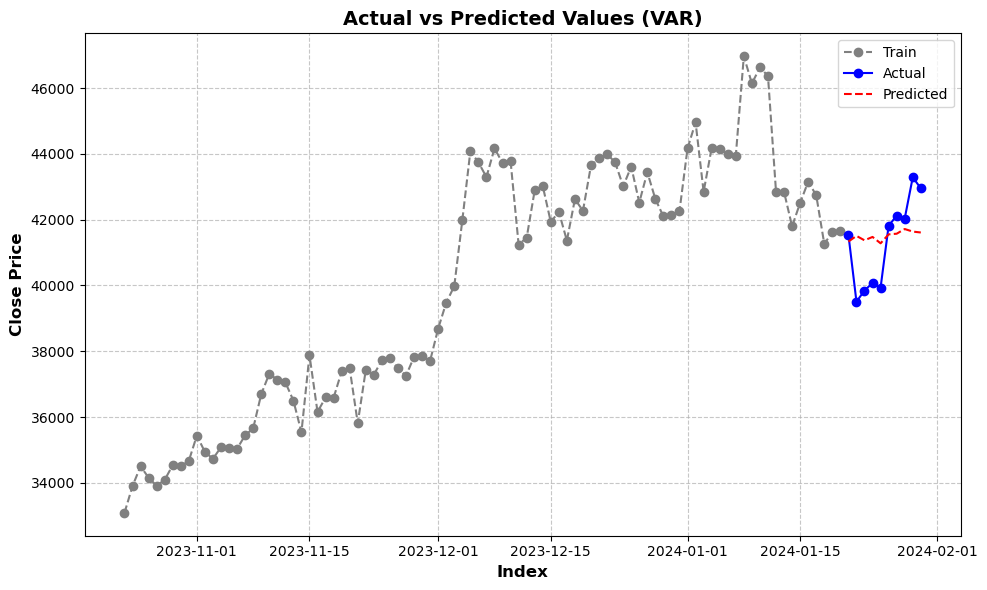

In [37]:
# Plot the actual values (y_test) and predicted values (y_pred)
plt.figure(figsize=(10, 6))

# Plot training data
plt.plot(df_train.index[-90:], df_train['Price'][-90:], label="Train", linestyle='--', marker='o', color='gray')

# Plot actual values
plt.plot(df_test.index, df_test['Price'], label='Actual', color='blue', marker='o')

# Plot predicted values
plt.plot(df_results.index, df_results['Price_forecast'], label='Predicted', color='red', linestyle='--')

plt.title('Actual vs Predicted Values (VAR)', fontsize=14, fontweight='bold')
plt.xlabel('Index', fontsize=12, fontweight='bold')
plt.ylabel('Close Price', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 4.1.10 Evaluate the Forecasts

In [38]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'me':me, 'mae': mae, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

In [39]:
for col in df.columns.values.tolist():
    print('\nForecast Accuracy of: ' + col)
    accuracy_prod = forecast_accuracy(df_results[col + '_forecast'].values, df_test[col].values)
    for k, v in accuracy_prod.items():
        print(k, ': ', round(v,4))


Forecast Accuracy of: Altcoin
me :  14.5837
mae :  16.7956
rmse :  18.4638
corr :  0.2214
minmax :  0.6056

Forecast Accuracy of: BIT
me :  -4.851
mae :  8.0639
rmse :  11.5279
corr :  -0.2433
minmax :  0.1003

Forecast Accuracy of: Bitcoin Address
me :  -0.7181
mae :  10.1405
rmse :  11.9988
corr :  -0.4645
minmax :  0.3544

Forecast Accuracy of: Bitcoin Investment
me :  -4.9655
mae :  5.566
rmse :  6.5928
corr :  0.0467
minmax :  inf

Forecast Accuracy of: Bitcoin Mining
me :  -3.6162
mae :  3.6362
rmse :  4.6126
corr :  -0.4112
minmax :  0.163

Forecast Accuracy of: Bitcoin News
me :  -0.4105
mae :  1.5866
rmse :  1.9319
corr :  -0.0754
minmax :  0.4022

Forecast Accuracy of: Bitcoin Price
me :  1.5423
mae :  1.7996
rmse :  2.2116
corr :  0.1719
minmax :  0.2034

Forecast Accuracy of: Bitcoin Wallet
me :  1.5311
mae :  6.2626
rmse :  7.1316
corr :  -0.3659
minmax :  0.8503

Forecast Accuracy of: Bitcoin
me :  -0.0187
mae :  1.6829
rmse :  2.1252
corr :  -0.2262
minmax :  0.1998

Fo

/var/folders/6p/bqwnqj2d5tz01q3xfms1n9c80000gn/T/ipykernel_99376/3252965265.py:11: RuntimeWarning: divide by zero encountered in divide
  minmax = 1 - np.mean(mins/maxs)             # minmax


#### 4.1.11 Writing model hyperparameter and metrics to file

In [40]:
# with open('metric_frame.csv', 'w') as file:
#     file.write('Order,Mean Error,MAE,RMSE,CORR,MINMAX')

In [41]:
# with open('metric_frame.csv', 'a') as file:
#     line = str(model_order)
#     for k, v in accuracy_prod.items():
#         line += ',' + str(v)
#     file.write('\n' + line)

### 4.2 Long Short-Term Memory (LSTM)

In [42]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [43]:
# Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
plt.style.use("ggplot")

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

2024-03-04 23:00:52.122856: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### 4.2.1 Read and preprocess the data

In [44]:
# Loading/Reading in the Data
df = pd.read_csv("final_raw_data.csv")
df_daily = df.set_index("Date")[['Close']]
df_daily = df_daily.set_index(pd.to_datetime(df_daily.index))

# Normalizing/Scaling the Data
scaler = MinMaxScaler()
df_daily = pd.DataFrame(scaler.fit_transform(df_daily), columns=['Close'], index=df_daily.index)

#### 4.2.2 Functions to use for visualizing the result, splitting data, and layer making

In [45]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(12,6))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(12,6))
    plt.plot(history['val_rmse'])
    plt.plot(history['rmse'])
    plt.legend(['val_rmse', 'rmse'])
    plt.title('RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.show()
    
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the univariate time sequence
    creates two arrays: X and y. 
    These variables are the input and output variables respectively for our Neural Network. 
    The input is the number of periods to look back and the output is the number of periods ahead. 
    """
    X, y = [], []
    
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        if out_end > len(seq):
            break
        
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

def layer_maker(model, n_layers, n_nodes, activation, drop=None, d_rate=.5):
    """
    Creates a specified number of hidden layers for an RNN
    Optional: Adds regularization option, dropout layer to prevent potential overfitting if necessary
    """
    
    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1, n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))

        # Adds a Dropout layer after every Nth hidden layer (the 'drop' variable)
        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass

#### 4.2.3 Functions to create our Recurrent Neural Network--LSTM

In [46]:
def init_model() :
    # Instantiating the model
    model = Sequential()

    # Activation
    activ = "softsign"

    # Input layer
    model.add(LSTM(n_per_in, activation=activ, return_sequences=True, input_shape=(n_per_in, n_features)))

    # Hidden layers
    layer_maker(model, n_layers=5, n_nodes=10, activation=activ, drop=2)

    # Final Hidden layer
    model.add(LSTM(n_per_out, activation=activ))

    # Output layer
    model.add(Dense(n_per_out))

    # Model summary
    model.summary()
    return model

#### 4.2.4 Model parameters and period units

In [47]:
"""
We choose to look back on 30 days of price history.
"""

# How many periods looking back to train
n_per_in  = 30

# How many periods ahead to predict
n_per_out = 10

# Features (in this case it's 1 because there is only one feature: price)
n_features = 1

# Splitting the data into appropriate sequences
X_daily, y_daily = split_sequence(list(df_daily.Close), n_per_in, n_per_out)

# Reshaping the X variable from 2D to 3D
X_daily = X_daily.reshape((X_daily.shape[0], X_daily.shape[1], n_features))
print(X_daily.shape, y_daily.shape)

(721, 30, 1) (721, 10)


#### 4.2.5 Fit the model by trying 100 epochs

In [48]:
model = init_model()
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=200,
    decay_rate=0.9)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss=tf.keras.losses.MeanAbsoluteError(reduction="auto", name="mean_absolute_error"),
              metrics=[tf.keras.metrics.MeanSquaredError(name="mean_squared_error", dtype=None),
                       tf.keras.metrics.RootMeanSquaredError(name="rmse", dtype=None),
                       tf.keras.metrics.MeanAbsoluteError(name="mean_absolute_error", dtype=None)])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 30)            3840      
                                                                 
 lstm_1 (LSTM)               (None, 30, 10)            1640      
                                                                 
 lstm_2 (LSTM)               (None, 30, 10)            840       
                                                                 
 dropout (Dropout)           (None, 30, 10)            0         
                                                                 
 lstm_3 (LSTM)               (None, 30, 10)            840       
                                                                 
 lstm_4 (LSTM)               (None, 30, 10)            840       
                                                                 
 dropout_1 (Dropout)         (None, 30, 10)            0

In [49]:
res_daily = model.fit(X_daily, y_daily, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
21/21 [==============================] - 8s 81ms/step - loss: 0.3093 - mean_squared_error: 0.1488 - rmse: 0.3857 - mean_absolute_error: 0.3093 - val_loss: 0.6911 - val_mean_squared_error: 0.4924 - val_rmse: 0.7017 - val_mean_absolute_error: 0.6911
Epoch 2/100
21/21 [==============================] - 1s 37ms/step - loss: 0.2386 - mean_squared_error: 0.0973 - rmse: 0.3119 - mean_absolute_error: 0.2386 - val_loss: 0.5541 - val_mean_squared_error: 0.3317 - val_rmse: 0.5760 - val_mean_absolute_error: 0.5541
Epoch 3/100
21/21 [==============================] - 1s 37ms/step - loss: 0.2064 - mean_squared_error: 0.0726 - rmse: 0.2695 - mean_absolute_error: 0.2064 - val_loss: 0.5202 - val_mean_squared_error: 0.2849 - val_rmse: 0.5337 - val_mean_absolute_error: 0.5202
Epoch 4/100
21/21 [==============================] - 1s 37ms/step - loss: 0.1672 - mean_squared_error: 0.0523 - rmse: 0.2287 - mean_absolute_error: 0.1672 - val_loss: 0.3847 - val_mean_squared_error: 0.1629 - val_rmse: 0

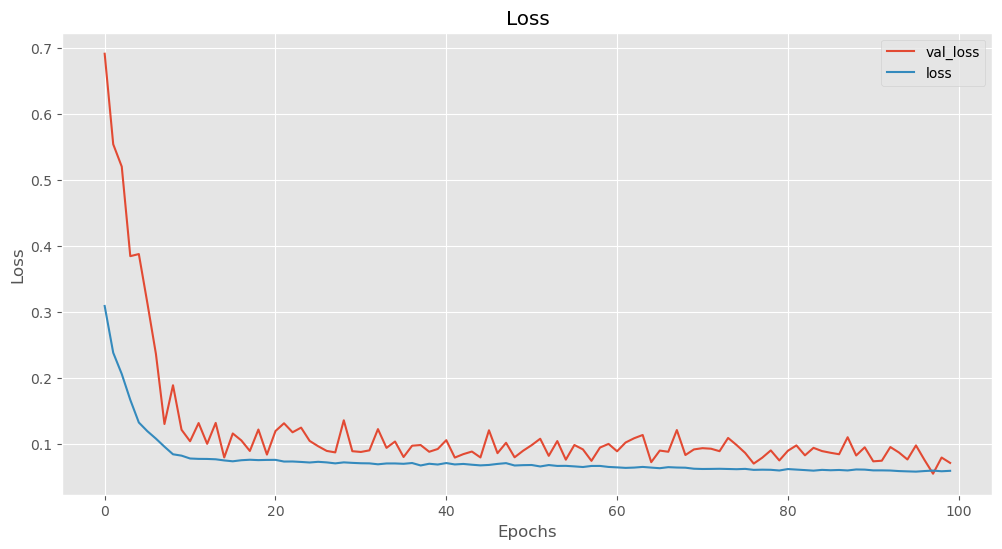

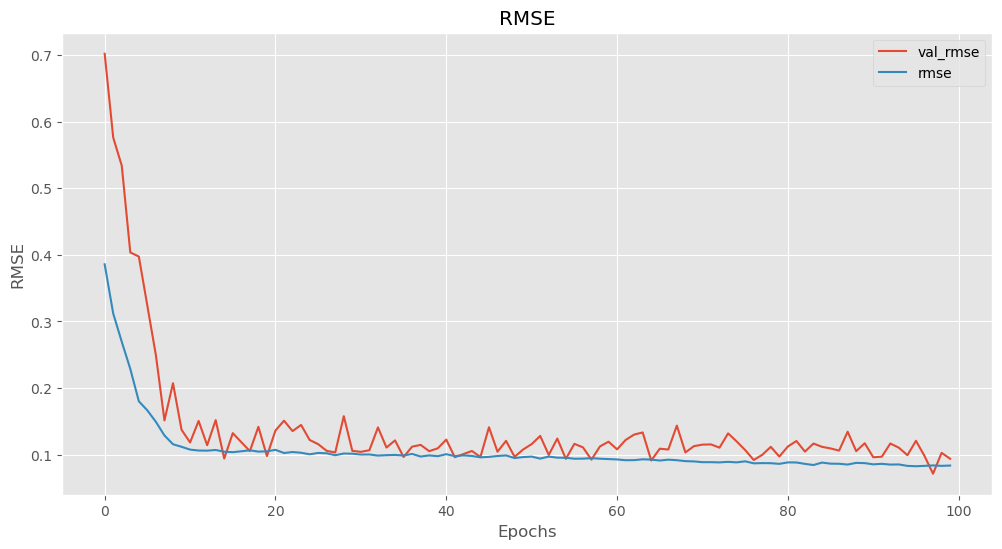

In [50]:
visualize_training_results(res_daily)

#### 4.2.6 Test our model with comparison against actual data

In [51]:
# Getting predictions of x_daily and transform them back to normal prices
yhat_daily = model.predict(X_daily[-1].reshape(1, n_per_in, n_features)).tolist()[0]
yhat_daily = scaler.inverse_transform(np.array(yhat_daily).reshape(-1,1)).tolist()

# Getting the actual values of y_daily
actual_daily = scaler.inverse_transform(y_daily[-1].reshape(-1,1))

print("\nActual Prices for the next 10 days:\n", actual_daily.tolist())
print("Predicted Prices for the next 10 days:\n", yhat_daily)

print("\n")

print(f'r2 score: {r2_score(y_true = actual_daily, y_pred = yhat_daily)}')
print(f'MAE: {mean_absolute_error(y_true = actual_daily, y_pred = yhat_daily)}')
print(f'RMSE: {math.sqrt(mean_squared_error(y_true = actual_daily, y_pred = yhat_daily))}')

1/1 [==============================] - 1s 746ms/step

Actual Prices for the next 10 days:
 [[41545.78515625], [39507.3671875], [39845.55078125], [40077.07421875], [39933.80859375], [41816.87109375], [42120.0546875], [42035.59375], [43288.24609375], [42952.609375]]
Predicted Prices for the next 10 days:
 [[42031.12955671118], [42511.00811666885], [41762.5738572391], [41926.750593824836], [41669.48517035361], [41855.959156293015], [41808.575362386415], [41603.15052078845], [41637.422535762424], [41346.480223014136]]


r2 score: -0.4754298700091184
MAE: 1303.1324684139167
RMSE: 1579.7688131165119


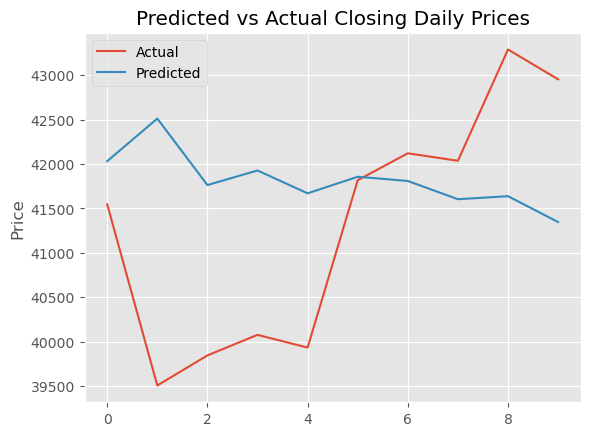

In [52]:
plt.plot(actual_daily.tolist(), label='Actual')
plt.plot(yhat_daily, label='Predicted')
plt.title(f"Predicted vs Actual Closing Daily Prices")
plt.ylabel("Price")
plt.legend()

#### 4.2.7 Use our model to forecast the future prices of Bitcoin

1/1 [==============================] - 0s 28ms/step
                   Close
2024-01-30  41687.629849
2024-01-31  42161.154064
2024-02-01  41452.260488
2024-02-02  41587.905416
2024-02-03  41353.925949
2024-02-04  41489.897911
2024-02-05  41408.951309
2024-02-06  41281.959471
2024-02-07  41290.565027
2024-02-08  40991.994457


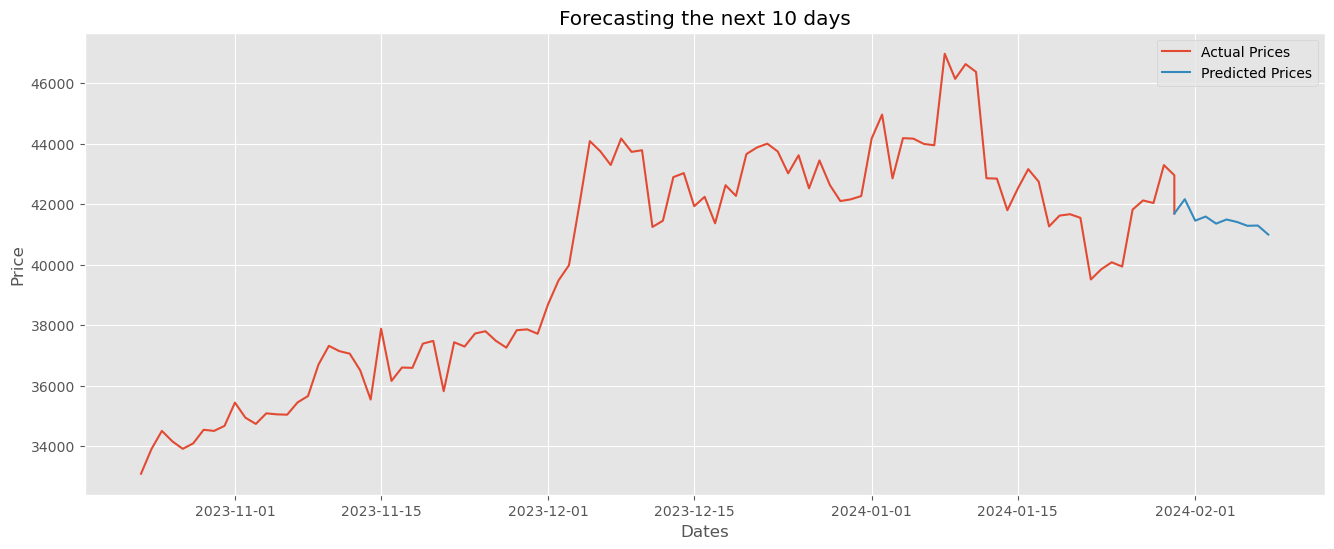

In [53]:
# Predicting daily future values and transforming to non-normal
yhat_future_daily = model.predict(np.array(df_daily.tail(n_per_in)).reshape(1, n_per_in, n_features)).tolist()[0]
yhat_future_daily = scaler.inverse_transform(np.array(yhat_future_daily).reshape(-1,1)).tolist()

# Creating a dataframe of the predicted prices
preds_daily = pd.DataFrame(yhat_future_daily, index=pd.date_range(start=df_daily.index[-1], periods=len(yhat_future_daily), freq="D"),
                           columns=df_daily.columns)

# Printing the predicted prices
print(preds_daily)

# Number of periods back to visualize the actual values
pers = 100

# Transforming the actual values to their original price
actual_future_daily = pd.DataFrame(scaler.inverse_transform(df_daily[["Close"]].tail(pers)), index=df_daily.Close.tail(pers).index,
                                   columns=df_daily.columns)
actual_future_daily = pd.concat([actual_future_daily, preds_daily.head(1)])

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual_future_daily, label="Actual Prices")
plt.plot(preds_daily, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat_future_daily)} days")
plt.legend()
plt.show()

### 4.3 AdaBoost

In [54]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

#### 4.3.1 Data Preprocessing

In [55]:
df = pd.read_csv('final_raw_data.csv')

In [56]:
df_train_timestamp = df[df["Date"]<= "2023-10-31"]['Close']
df_train_timestamp = df_train_timestamp.values.reshape(-1,1)
df_test_timestamp = df[df["Date"]> "2023-10-31"]['Close']
df_test_timestamp = df_test_timestamp.values.reshape(-1, 1)
df_train_timestamp.shape

(669, 1)

#### 4.3.2 Create timestep matrix

The function, create_dataset, is designed to convert an array of values into a dataset matrix. This function prepares a dataset for training a model by creating input-output pairs, where each input consists of time_step(5 in our case) consecutive values from the original dataset, and the corresponding output is the next value in the sequence.

In [57]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [58]:
time_step = 5
X_train, y_train = create_dataset(df_train_timestamp, time_step)
X_test, y_test = create_dataset(df_test_timestamp, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (663, 5)
y_train:  (663,)
X_test:  (85, 5)
y_test (85,)


#### 4.3.3 Hyperparameter Tuning

In [59]:
param_grid_adb = {
    'estimator':[
        DecisionTreeRegressor(max_depth=1),
        DecisionTreeRegressor(max_depth=10),
        DecisionTreeRegressor(max_depth=None)
    ],
    'n_estimators':[10, 50, 100],
    'learning_rate':[0.1, 1.0, 10]
}

In [60]:
grid = GridSearchCV(AdaBoostRegressor(random_state = 0), param_grid_adb, n_jobs = -1)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'estimator': DecisionTreeRegressor(max_depth=10), 'learning_rate': 0.1, 'n_estimators': 10}


#### 4.3.4 Fit the model using best hyperparameters

In [61]:
model = AdaBoostRegressor(**grid.best_params_, random_state = 0)

In [62]:
model.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.1, n_estimators=10, random_state=0)

In [63]:
y_pred = model.predict(X_test)

#### 4.3.5 Evaluate the model and plot the results

In [64]:
print(f'r2 score: {r2_score(y_true = y_test, y_pred = y_pred)}')
print(f'MAE: {mean_absolute_error(y_true = y_test, y_pred = y_pred)}')
print(f'RMSE: {math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))}')

r2 score: 0.7823044652255707
MAE: 1113.3913199086455
RMSE: 1420.7352074918692


In [65]:
y_train.shape

(663,)

In [66]:
index_values = np.arange(len(y_train), len(y_train) + len(y_test))
train_index_value = np.arange(1,len(y_train)+1)

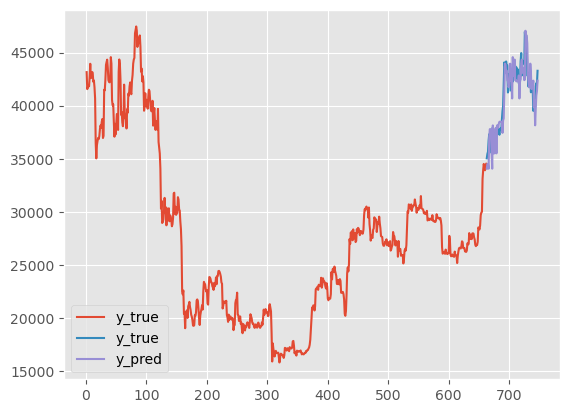

In [67]:
plt.plot(train_index_value, y_train, label = 'y_true')
plt.plot(index_values, y_test, label = 'y_true')
plt.plot(index_values, y_pred, label = 'y_pred')
plt.legend()
plt.show()

#### 4.3.6 Predict next 10 days

In [68]:
x_input = df[-30:]['Close'].values.reshape(-1,1)
time_step = 5
pred_dates = 10
X_train_adaboost_next_10, y_train_adaboost_next_10 = create_dataset(x_input, time_step)
y_pred_adaboost_next_10 = model.predict(X_train_adaboost_next_10)
y_pred_adaboost_next_10 = y_pred_adaboost_next_10[time_step:]
y_pred_adaboost_next_10 = y_pred_adaboost_next_10[:time_step+pred_dates]

In [69]:
prediction_output = y_pred_adaboost_next_10[:time_step]
for i in range(pred_dates):
    y_pred_next_1 = model.predict(prediction_output[-time_step:].reshape(1,time_step)) 
    prediction_output = np.append(prediction_output, y_pred_next_1)
prediction_output

array([46622.67578125, 45868.94921875, 43160.9296875 , 42257.1875    ,
       41733.94140625, 41733.94140625, 41821.26171875, 42368.9921875 ,
       42892.95703125, 43960.93359375, 43949.1015625 , 43099.69921875,
       42407.9375    , 42257.1875    , 42197.515625  ])

In [70]:
prediction_output.shape

(15,)

In [71]:
# True Value
actual_value = x_input[time_step:pred_dates+time_step*2]
actual_value

array([[43989.1953125 ],
       [43943.09765625],
       [46970.50390625],
       [46139.73046875],
       [46627.77734375],
       [46368.5859375 ],
       [42853.16796875],
       [42842.3828125 ],
       [41796.26953125],
       [42511.96875   ],
       [43154.9453125 ],
       [42742.65234375],
       [41262.05859375],
       [41618.40625   ],
       [41665.5859375 ]])

#### 4.3.7 Calculate MAE, MSE, R^2 on predicted data points

In [72]:
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(actual_value, prediction_output)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(actual_value, prediction_output))))

Mean Absolute Error - MAE : 1953.2447916666667
Root Mean squared Error - RMSE : 2490.167690689261


In [73]:
SSE = np.sum((actual_value - prediction_output)**2)
SST = np.sum((prediction_output - np.mean(actual_value))**2)
1 - SSE/SST

-37.620638002369446

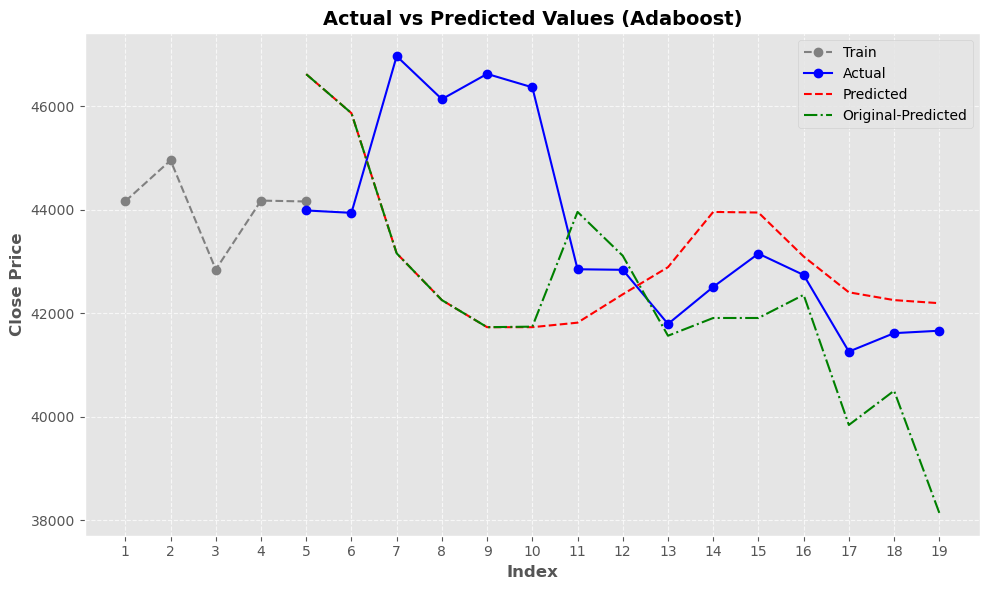

In [74]:
import numpy as np
import matplotlib.pyplot as plt

index_values = np.arange(time_step, pred_dates + time_step * 2)
train_index_value = np.arange(1, time_step + 1)

# Plot the actual values (y_test) and predicted values (y_pred)
plt.figure(figsize=(10, 6))

# Plot training data
plt.plot(train_index_value, x_input[:time_step], label="Train", linestyle='--', marker='o', color='gray')

# Plot actual values
plt.plot(index_values, actual_value, label='Actual', color='blue', marker='o')

# Plot predicted values
plt.plot(index_values, prediction_output, label='Predicted', color='red', linestyle='--')

# Plot original predicted values
plt.plot(index_values, y_pred_adaboost_next_10, label='Original-Predicted', color='green', linestyle='-.')

# Set integer ticks for x-axis
plt.xticks(np.arange(1, max(index_values)+1, 1))

plt.title('Actual vs Predicted Values (Adaboost)', fontsize=14, fontweight='bold')
plt.xlabel('Index', fontsize=12, fontweight='bold')
plt.ylabel('Close Price', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4.4 LightGBM

Since LightGBM needs a larger storage to run, we have a separate coding file for this model for Google Colab. <br>
Refer to another file for data information.

### 4.5 XGBoost

In [75]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

#### 4.5.1 Data Preprocessing

In [76]:
df = pd.read_csv('final_raw_data.csv')

In [77]:
df_train_timestamp = df[df["Date"]<= "2023-10-31"]['Close']
df_train_timestamp = df_train_timestamp.values.reshape(-1,1)
df_test_timestamp = df[df["Date"]> "2023-10-31"]['Close']
df_test_timestamp = df_test_timestamp.values.reshape(-1, 1)
df_train_timestamp.shape

(669, 1)

#### 4.5.2 Create timestep matrix

The function, create_dataset, is designed to convert an array of values into a dataset matrix. This function prepares a dataset for training a model by creating input-output pairs, where each input consists of time_step(5 in our case) consecutive values from the original dataset, and the corresponding output is the next value in the sequence.

In [78]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [79]:
time_step = 5
X_train_xgboost, y_train_xgboost = create_dataset(df_train_timestamp, time_step)
X_test_xgboost, y_test_xgboost = create_dataset(df_test_timestamp, time_step)

print("X_train: ", X_train_xgboost.shape)
print("y_train: ", y_train_xgboost.shape)
print("X_test: ", X_test_xgboost.shape)
print("y_test", y_test_xgboost.shape)

X_train:  (663, 5)
y_train:  (663,)
X_test:  (85, 5)
y_test (85,)


In [80]:
X_train_xgboost

array([[47686.8125    , 47345.21875   , 46458.1171875 , 45897.57421875,
        43569.00390625],
       [47345.21875   , 46458.1171875 , 45897.57421875, 43569.00390625,
        43160.9296875 ],
       [46458.1171875 , 45897.57421875, 43569.00390625, 43160.9296875 ,
        41557.90234375],
       ...,
       [33086.234375  , 33901.52734375, 34502.8203125 , 34156.6484375 ,
        33909.80078125],
       [33901.52734375, 34502.8203125 , 34156.6484375 , 33909.80078125,
        34089.57421875],
       [34502.8203125 , 34156.6484375 , 33909.80078125, 34089.57421875,
        34538.48046875]])

#### 4.5.3 Timestep Validation

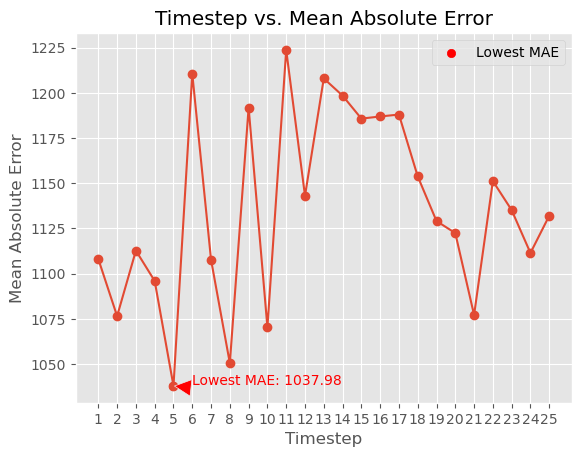

In [81]:
timesteps_list = []
mae_list =[]
for time_step in range(1, 26):
    # Create datasets
    X_train, y_train = create_dataset(df_train_timestamp, time_step)
    X_test, y_test = create_dataset(df_test_timestamp, time_step)
    
    # Define XGBoost parameters
    model = XGBRegressor(
        booster='gbtree',
        n_estimators=50,        
        learning_rate=0.3,         
        max_depth=3
    )
    
    # Train the model
    model.fit(X_train, y_train, verbose=False)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    
    # Append timestep and MAE to lists
    timesteps_list.append(time_step)
    mae_list.append(mae)

# Plot timestep vs. MAE
plt.plot(timesteps_list, mae_list, marker='o')
plt.title('Timestep vs. Mean Absolute Error')
plt.xlabel('Timestep')
plt.ylabel('Mean Absolute Error')
plt.xticks(timesteps_list)
plt.grid(True)

# Find index of minimum MAE value
min_mae_index = mae_list.index(min(mae_list))

# Highlight the lowest point
plt.scatter(timesteps_list[min_mae_index], mae_list[min_mae_index], color='red', label='Lowest MAE')

# Annotate the lowest MAE value
plt.annotate(f'Lowest MAE: {min(mae_list):.2f}', 
             xy=(timesteps_list[min_mae_index], mae_list[min_mae_index]), 
             xytext=(timesteps_list[min_mae_index] + 1, mae_list[min_mae_index] + 0.5),
             arrowprops=dict(facecolor='red', shrink=0.05),
             color='red'
            )

plt.legend()
plt.show()

#### 4.5.4 Perform Grid Search to find optimal parameters

In [82]:
# Define the parameter grid
param_grid = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'max_depth': [3, 5, 7, 12],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.3, 0.8]
}
# Initialize the XGBoost regressor
mymodel_xgb = XGBRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=mymodel_xgb, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_xgboost, y_train_xgboost)

# Get the results of the grid search
results = grid_search.cv_results_
params = results['params']
mean_scores = -results['mean_test_score']

# Extract the parameter values and scores
n_estimators = [param['n_estimators'] for param in params]
learning_rate = [param['learning_rate'] for param in params]
max_depth = [param['max_depth'] for param in params]
# Print the best parameter
best_params = grid_search.best_params_
print(grid_search)
print("Best Parameter:", best_params)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_

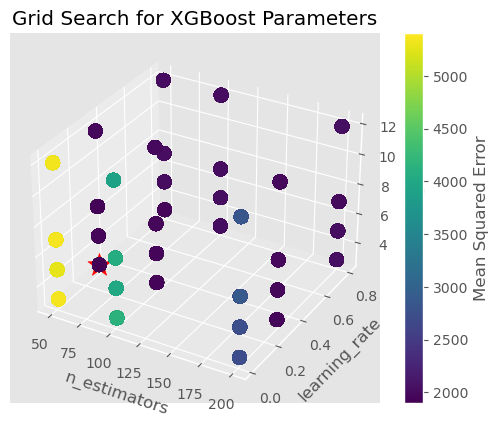

In [83]:
# Get index of the smallest MSE
best_index = np.argmin(mean_scores)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
sc = ax.scatter(n_estimators, learning_rate, max_depth, c=mean_scores, cmap='viridis', s=100)

# Highlight the point with the smallest MSE
ax.scatter(n_estimators[best_index], learning_rate[best_index], max_depth[best_index], c='red', s=300, marker='*')

# Set labels and title
ax.set_xlabel('n_estimators')
ax.set_ylabel('learning_rate')
ax.set_zlabel('max_depth')
ax.set_title('Grid Search for XGBoost Parameters')

# Add a colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Mean Squared Error')

plt.show()

In [84]:
# Building Model
from xgboost import XGBRegressor
my_model_xgb = XGBRegressor(n_estimators=50,
                        learning_rate = 0.2,
                        max_depth = 3,
                        booster = 'gbtree')
                        #colsample_bytree = 0.8, 
                        #gamma= 0.5, 
                        #min_child_weight = 1, 
                        #subsample = 1.0,
                        
                        
                    
my_model_xgb.fit(X_train_xgboost, y_train_xgboost, verbose=False)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### 4.5.5 MAE, MSE, R^2 on test dataset

In [85]:
y_pred_xgboost = my_model_xgb.predict(X_test_xgboost)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test_xgboost, y_pred_xgboost)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test_xgboost, y_pred_xgboost))))
print("R saquared - R^2 : " + str(math.sqrt(r2_score(y_test_xgboost, y_pred_xgboost))))

Mean Absolute Error - MAE : 1066.8053768382354
Root Mean squared Error - RMSE : 1360.7780482505298
R saquared - R^2 : 0.8945898019033768


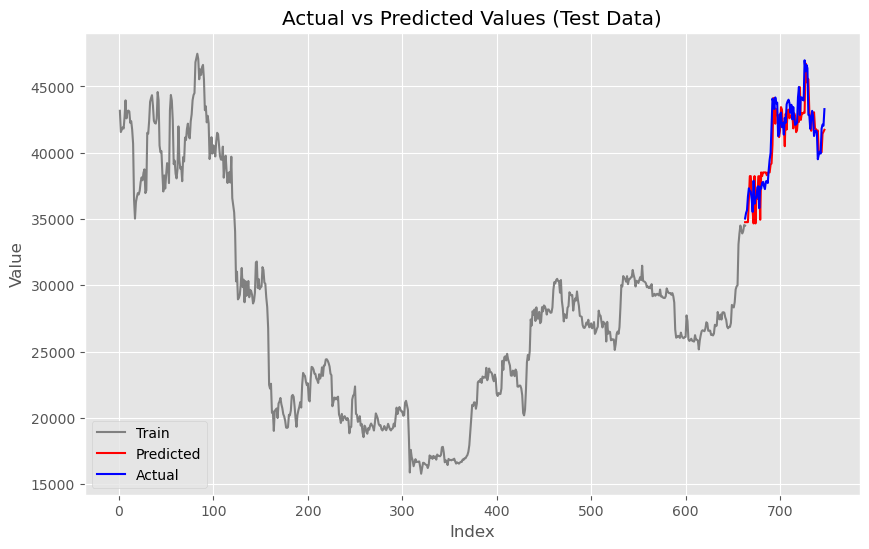

In [86]:
index_values = np.arange(len(y_train_xgboost), len(y_train_xgboost) + len(y_test_xgboost))
train_index_value = np.arange(1,len(y_train_xgboost)+1)
# Plot the actual values (y_test) and predicted values (y_pred)
plt.figure(figsize=(10, 6))
plt.plot(train_index_value, y_train_xgboost, label = "Train", color = "grey")
plt.plot(index_values, y_pred_xgboost, label='Predicted',color = "r")
plt.plot(index_values, y_test_xgboost, label='Actual', color = "b")
plt.title('Actual vs Predicted Values (Test Data)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

#### 4.5.6 Predict next 10 days

In [87]:
x_input = df[-26:]['Close'].values.reshape(-1,1)
time_step = 5
pred_dates = 10
X_train_xgboost_next_10, y_train_xgboost_next_10 = create_dataset(x_input, time_step)
y_pred_xgboost_next_10 = my_model_xgb.predict(X_train_xgboost_next_10)
y_pred_xgboost_next_10 = y_pred_xgboost_next_10[time_step:]
y_pred_xgboost_next_10 = y_pred_xgboost_next_10[:time_step+pred_dates]

In [88]:
prediction_output = y_pred_xgboost_next_10[:time_step]
for i in range(pred_dates):
    y_pred_next_1 = my_model_xgb.predict(prediction_output[-time_step:].reshape(1,time_step)) 
    prediction_output = np.append(prediction_output, y_pred_next_1)
prediction_output

array([41654.223, 42704.242, 42838.67 , 43052.07 , 41848.484, 41775.246,
       41845.73 , 41595.527, 41679.07 , 42036.484, 42036.484, 42036.484,
       42036.484, 41525.24 , 41525.24 ], dtype=float32)

In [89]:
prediction_output.shape

(15,)

In [90]:
# True Value
actual_value = x_input[time_step:pred_dates+time_step*2]
actual_value

array([[46627.77734375],
       [46368.5859375 ],
       [42853.16796875],
       [42842.3828125 ],
       [41796.26953125],
       [42511.96875   ],
       [43154.9453125 ],
       [42742.65234375],
       [41262.05859375],
       [41618.40625   ],
       [41665.5859375 ],
       [41545.78515625],
       [39507.3671875 ],
       [39845.55078125],
       [40077.07421875]])

#### 4.5.7 Calculate MAE, MSE, R^2 on predicted data points

In [91]:
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(actual_value, prediction_output)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(actual_value, prediction_output))))

Mean Absolute Error - MAE : 1297.4010416666667
Root Mean squared Error - RMSE : 1894.2943933656597


In [92]:
SSE = np.sum((actual_value - prediction_output)**2)
SST = np.sum((prediction_output - np.mean(actual_value))**2)
1 - SSE/SST

-211.42294410292942

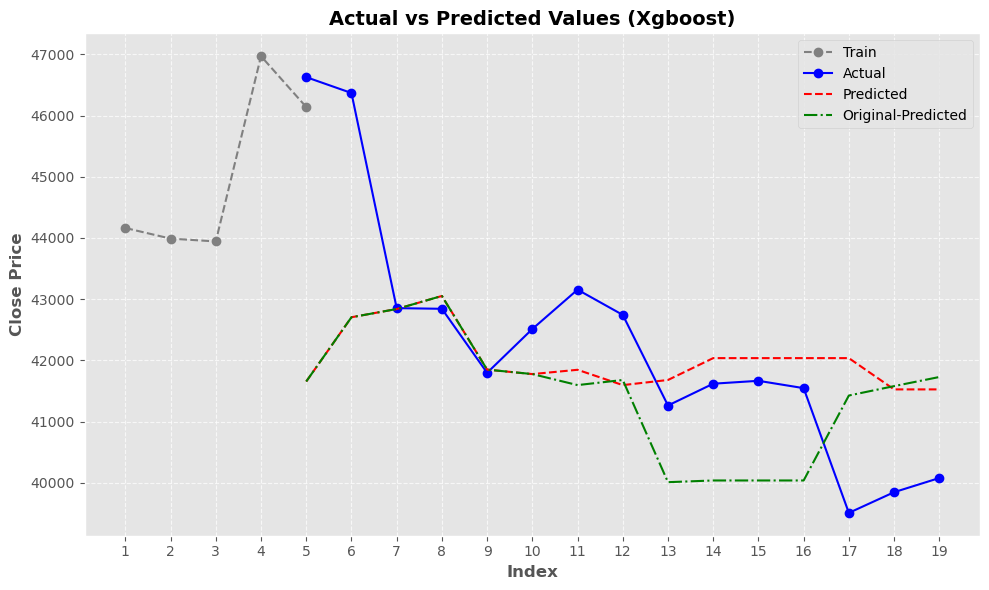

In [93]:
import numpy as np
import matplotlib.pyplot as plt

index_values = np.arange(time_step, pred_dates + time_step * 2)
train_index_value = np.arange(1, time_step + 1)

# Plot the actual values (y_test) and predicted values (y_pred)
plt.figure(figsize=(10, 6))

# Plot training data
plt.plot(train_index_value, x_input[:time_step], label="Train", linestyle='--', marker='o', color='gray')

# Plot actual values
plt.plot(index_values, actual_value, label='Actual', color='blue', marker='o')

# Plot predicted values
plt.plot(index_values, prediction_output, label='Predicted', color='red', linestyle='--')

# Plot original predicted values
plt.plot(index_values, y_pred_xgboost_next_10, label='Original-Predicted', color='green', linestyle='-.')

# Set integer ticks for x-axis
plt.xticks(np.arange(1, max(index_values)+1, 1))

plt.title('Actual vs Predicted Values (Xgboost)', fontsize=14, fontweight='bold')
plt.xlabel('Index', fontsize=12, fontweight='bold')
plt.ylabel('Close Price', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4.6 Decision Tree Regressor (Classification and Regression Trees, CART)

#### 4.6.1 Data Processing

In [94]:
time_step = 5
X_train_cart, y_train_cart = create_dataset(df_train_timestamp, time_step)
X_test_cart, y_test_cart = create_dataset(df_test_timestamp, time_step)

print("X_train: ", X_train_cart.shape)
print("y_train: ", y_train_cart.shape)
print("X_test: ", X_test_cart.shape)
print("y_test", y_test_cart.shape)

X_train:  (663, 5)
y_train:  (663,)
X_test:  (85, 5)
y_test (85,)


#### 4.6.2 Build Model

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the decision tree regressor
dtr = DecisionTreeRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=10, scoring='neg_mean_absolute_error')

# Perform cross-validation
grid_search.fit(X_train_cart, y_train_cart)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(grid_search)
print("Best Parameters:", best_params)

# Access the results
results = grid_search.cv_results_

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_absolute_error')
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [96]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(min_samples_split=2, 
                            #stop split if node contains less than 10 samples
                            ccp_alpha=0.02,
                            random_state = 40,
                            max_depth = 5
                            )
dtr = dtr.fit(X_train_cart, y_train_cart)

Node count = 63


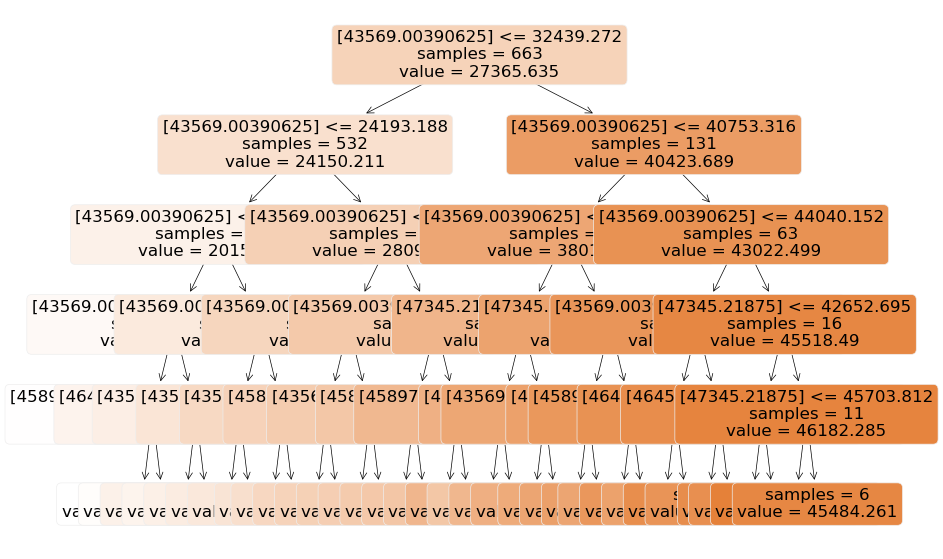

In [97]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
print('Node count =', dtr.tree_.node_count)
plt.figure(figsize=(9,7))
plot_tree(dtr, 
          feature_names=list(df_train_timestamp),          
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

In [98]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtr, X_train_cart, y_train_cart, cv=10, scoring='neg_mean_absolute_error')

Best Parameter: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


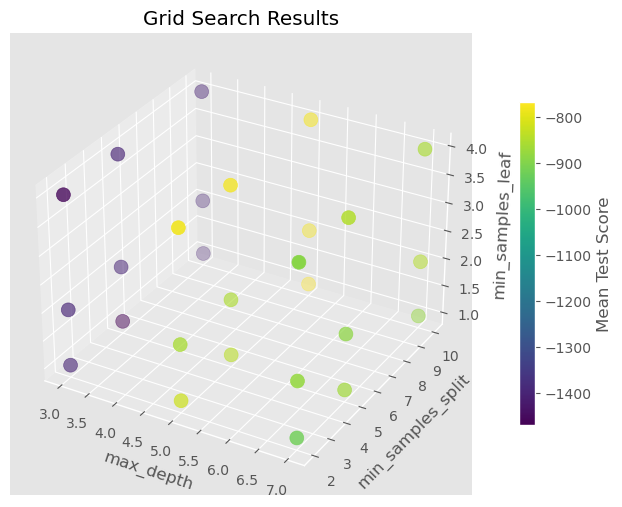

In [99]:
# Accessing parameters and mean test scores from the grid search results
params = grid_search.cv_results_['params']
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Extracting parameter values
max_depth_values = [param['max_depth'] for param in params]
min_samples_split_values = [param['min_samples_split'] for param in params]
min_samples_leaf_values = [param['min_samples_leaf'] for param in params]

# Plotting
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(max_depth_values, min_samples_split_values, min_samples_leaf_values, c=mean_test_scores, cmap='viridis', s=100)
ax.set_xlabel('max_depth')
ax.set_ylabel('min_samples_split')
ax.set_zlabel('min_samples_leaf')
ax.set_title('Grid Search Results')

# Add colorbar
cbar = plt.colorbar(sc, shrink=0.7)
cbar.set_label('Mean Test Score')

# Print the best parameter
best_params = grid_search.best_params_
print("Best Parameter:", best_params)

plt.show()

#### 4.6.3 Calculate MAE, MSE, R^2 on test dataset

In [100]:
y_pred_cart = dtr.predict(X_test_cart)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test_cart, y_pred_cart)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test_cart, y_pred_cart))))
print("R squared - R^2 : " + str(math.sqrt(r2_score(y_test_cart, y_pred_cart))))

Mean Absolute Error - MAE : 1681.1121560647618
Root Mean squared Error - RMSE : 2397.719727234112
R squared - R^2 : 0.6164085375207449


#### 4.6.4 Predict next 10 days

In [101]:
time_step = 5
pred_dates = 10
X_train_cart_next_10, y_train_cart_next_10 = create_dataset(x_input, time_step)
y_pred_cart_next_10 = my_model_xgb.predict(X_train_cart_next_10)
y_pred_cart_next_10 = y_pred_cart_next_10[time_step:]
y_pred_cart_next_10 = y_pred_cart_next_10[:time_step+pred_dates]

In [102]:
prediction_output_cart = y_pred_cart_next_10[:time_step]
for i in range(pred_dates):
    y_pred_next_1 = dtr.predict(prediction_output_cart[-time_step:].reshape(1,time_step)) 
    prediction_output_cart = np.append(prediction_output_cart, y_pred_next_1)
prediction_output_cart

array([41654.22265625, 42704.2421875 , 42838.671875  , 43052.0703125 ,
       41848.484375  , 41678.81872106, 41678.81872106, 41678.81872106,
       41678.81872106, 41678.81872106, 41678.81872106, 41678.81872106,
       41678.81872106, 41678.81872106, 41678.81872106])

In [103]:
# True Value
actual_value_cart = x_input[time_step:pred_dates+time_step*2]
actual_value_cart

array([[46627.77734375],
       [46368.5859375 ],
       [42853.16796875],
       [42842.3828125 ],
       [41796.26953125],
       [42511.96875   ],
       [43154.9453125 ],
       [42742.65234375],
       [41262.05859375],
       [41618.40625   ],
       [41665.5859375 ],
       [41545.78515625],
       [39507.3671875 ],
       [39845.55078125],
       [40077.07421875]])

#### 4.6.5 MAE, RMSE, R^2 Calculation on predicted data points

In [104]:
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(actual_value_cart, prediction_output_cart)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(actual_value_cart, prediction_output_cart))))

Mean Absolute Error - MAE : 1234.4873360339514
Root Mean squared Error - RMSE : 1880.6429333644571


In [105]:
SSE = np.sum((actual_value_cart - prediction_output_cart)**2)
SST = np.sum((prediction_output_cart - np.mean(actual_value_cart))**2)
1 - SSE/SST

-175.02128724177467

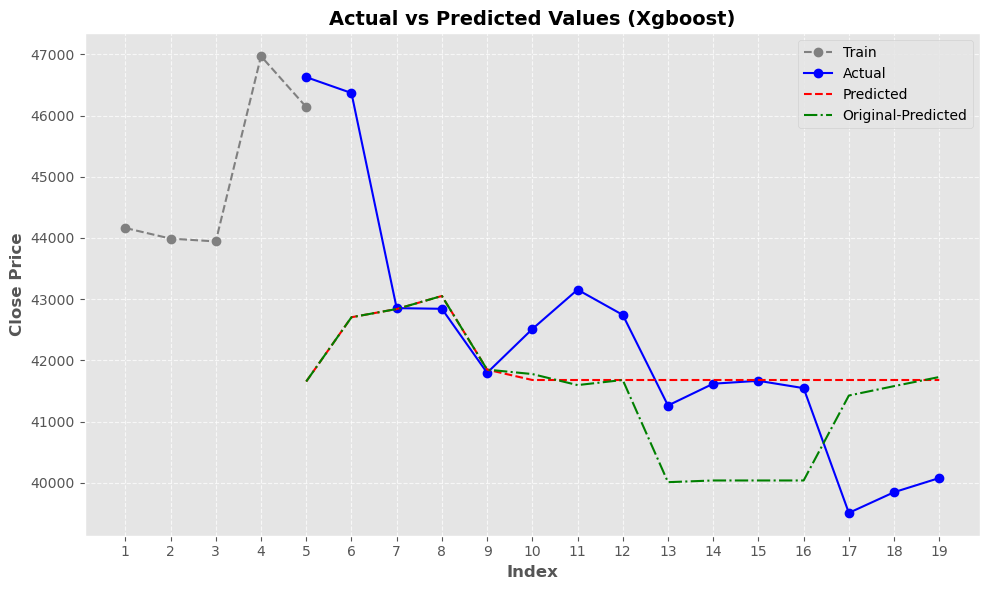

In [106]:
import numpy as np
import matplotlib.pyplot as plt

index_values = np.arange(time_step, pred_dates + time_step * 2)
train_index_value = np.arange(1, time_step + 1)

# Plot the actual values (y_test) and predicted values (y_pred)
plt.figure(figsize=(10, 6))

# Plot training data
plt.plot(train_index_value, x_input[:time_step], label="Train", linestyle='--', marker='o', color='gray')

# Plot actual values
plt.plot(index_values, actual_value_cart, label='Actual', color='blue', marker='o')

# Plot predicted values
plt.plot(index_values, prediction_output_cart, label='Predicted', color='red', linestyle='--')

# Plot original predicted values
plt.plot(index_values, y_pred_cart_next_10, label='Original-Predicted', color='green', linestyle='-.')

# Set integer ticks for x-axis
plt.xticks(np.arange(1, max(index_values)+1, 1))

plt.title('Actual vs Predicted Values (Xgboost)', fontsize=14, fontweight='bold')
plt.xlabel('Index', fontsize=12, fontweight='bold')
plt.ylabel('Close Price', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4.7 Autoregressive Integrated Moving Average (ARIMA)

#### 4.7.1 Data Preprocessing

In [107]:
df_train_arima= df[df["Date"]<= "2024-01-15"]['Close']
df_test_arima = df[df["Date"]> "2024-01-15"]['Close']
print(df_train_arima.shape)
df_test_arima.shape

(745,)


(15,)

#### 4.7.2 Build Model

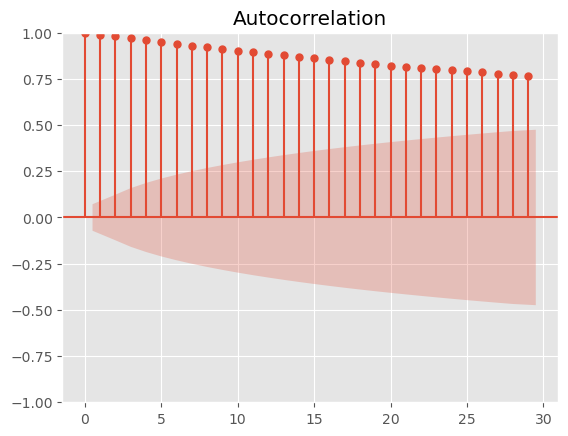

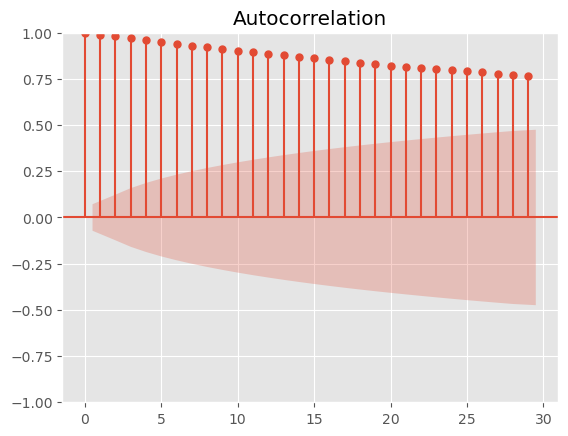

In [108]:
# check autocorrelation
sm.graphics.tsa.plot_acf(df_train_arima)

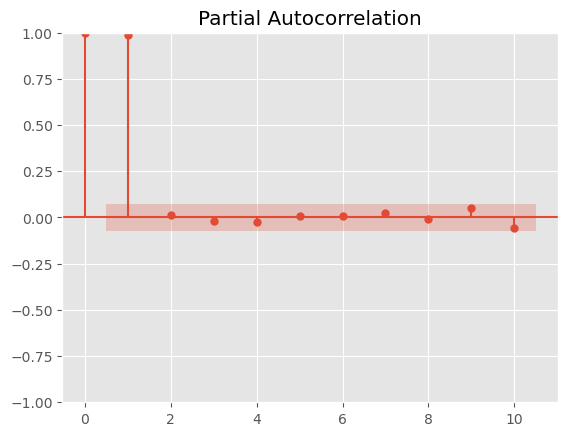

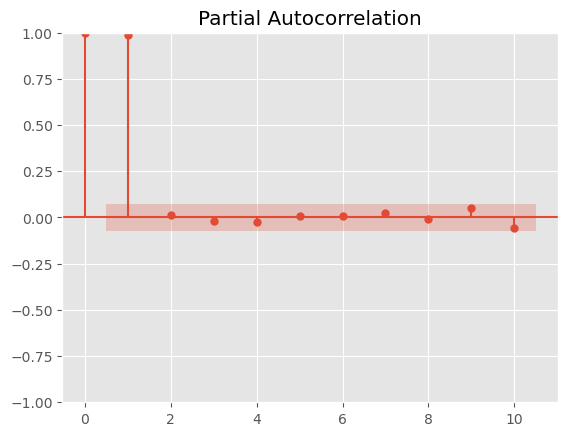

In [109]:
# check autocorrelation
sm.graphics.tsa.plot_pacf(df_train_arima,lags=10)

In [110]:
arima = pm.auto_arima(df_train_arima, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False, m=8)

/Users/brenda/anaconda3/lib/python3.11/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (8) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=12408.257, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=12698.129, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=12561.781, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=12466.013, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=12696.133, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=12423.117, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=12447.506, Time=0.10 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=12402.804, Time=0.13 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=12455.698, Time=0.15 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=12389.829, Time=0.15 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=12443.271, Time=0.14 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=12433.239, Time=0.16 sec
 ARIMA(4,2,3)(0,0,0)[0] intercept   : AIC=12448.493, Time=0.16 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=12402.188, Time=0.14 sec
 ARIMA(5,2,1)(0,0,0

In [111]:
arima_model = sm.tsa.arima.ARIMA(df_train_arima, order=(4,2,2))
res_arima = arima_model.fit()
print(res_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  745
Model:                 ARIMA(4, 2, 2)   Log Likelihood               -6181.829
Date:                Mon, 04 Mar 2024   AIC                          12377.657
Time:                        23:25:39   BIC                          12409.932
Sample:                             0   HQIC                         12390.099
                                - 745                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6088      0.038    -15.929      0.000      -0.684      -0.534
ar.L2          0.2488      0.023     10.765      0.000       0.203       0.294
ar.L3         -0.0063      0.016     -0.399      0.6

In [112]:
df_arima_pred = res_arima.forecast(steps=15)
df_arima_pred

745    42722.093987
746    42817.867717
747    42882.648544
748    42879.225955
749    42928.076973
750    42932.345278
751    42978.278967
752    42989.818295
753    43031.110056
754    43047.032854
755    43084.557533
756    43103.638460
757    43138.438461
758    43159.833855
759    43192.659181
Name: predicted_mean, dtype: float64

#### 4.7.3 Calculate MAE, MSE, R^2 on predicted data point

In [113]:
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(df_test_arima, df_arima_pred)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(df_test_arima, df_arima_pred))))


Mean Absolute Error - MAE : 1496.236257952504
Root Mean squared Error - RMSE : 1864.4465513358093


In [114]:
SSE = np.sum((df_test_arima - df_arima_pred)**2)
SST = np.sum((df_arima_pred - np.mean(df_test_arima))**2)
1 - SSE/SST

-0.7064060037130355

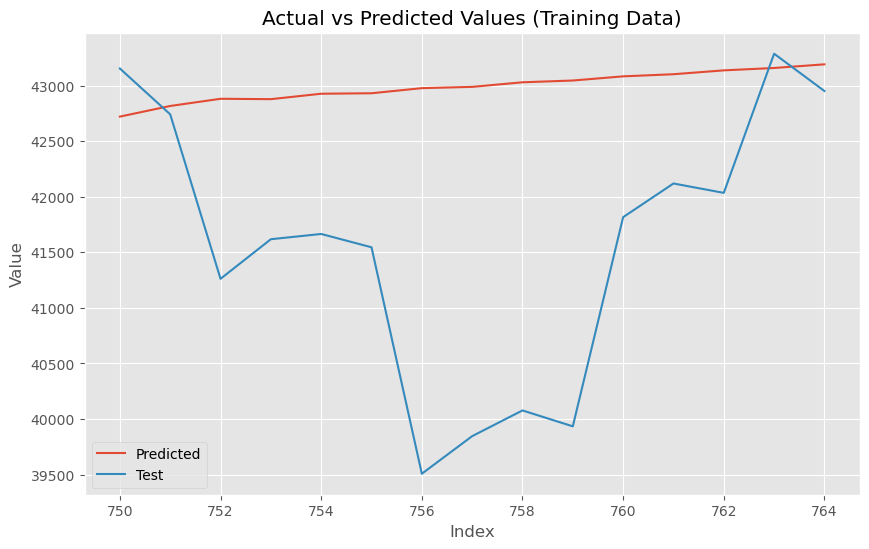

In [115]:
index_values = np.arange(750, 750 + len(df_test_arima))
train_index_value = np.arange(1,len(df_train_arima)+1)
# Plot the actual values (y_test) and predicted values (y_pred)
plt.figure(figsize=(10, 6))
#plt.plot(train_index_value, df_train_arima, label = "Train")
plt.plot(index_values, df_arima_pred, label='Predicted')
plt.plot(index_values, df_test_arima, label='Test')
plt.title('Actual vs Predicted Values (Training Data)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

### 4.8 Lasso Regressor

In [116]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

#### 4.8.1 Read and Preprocess Data

In [117]:
df = pd.read_csv('final_raw_data.csv')

In [118]:
df = df.drop(['Open','High','Low','Volume'],axis=1)

In [119]:
df.columns

Index(['Date', 'Altcoin', 'BIT', 'Bitcoin Address', 'Bitcoin Investment',
       'Bitcoin Mining', 'Bitcoin News', 'Bitcoin Price', 'Bitcoin Wallet',
       'Bitcoin', 'Block', 'Blockchain', 'BTC', 'Crypto', 'Cryptocurrency',
       'Cryptography', 'DAPP', 'DeFi', 'Digital Currency', 'Ethereum',
       'Fiat money', 'Fork', 'Hash Rate', 'ICO', 'P2P', 'Private Key',
       'Stablecoin', 'Close'],
      dtype='object')

In [120]:
df['Date'] = pd.to_datetime(df['Date'])

#### 4.8.2 Get Train and Test Data for Modeling

In [121]:
train_start_date = '2022-01-01'
train_end_date = '2023-10-31'
test_start_date = '2023-11-01'
test_end_date = '2024-01-30'

train_mask = (df['Date'] >= train_start_date) & (df['Date'] <= train_end_date)
test_mask = (df['Date'] >= test_start_date) & (df['Date'] <= test_end_date)

train_data = df[train_mask]
test_data = df[test_mask]

train_data = train_data.drop('Date',axis=1)
test_data = test_data.drop('Date',axis=1)

X_train = train_data.drop(columns=['Close'])
y_train = train_data['Close']

X_test = test_data.drop(columns=['Close'])
y_test = test_data['Close']

In [122]:
X_test

,Altcoin,BIT,Bitcoin Address,Bitcoin Investment,Bitcoin Mining,Bitcoin News,Bitcoin Price,Bitcoin Wallet,Bitcoin,Block,...,DeFi,Digital Currency,Ethereum,Fiat money,Fork,Hash Rate,ICO,P2P,Private Key,Stablecoin
669,7.48,80.19,62.37,31.96,17.75,16.80,20.24,3.84,21.00,31.62,...,9.18,5.60,7.99,1.96,41.16,8.10,68.82,72.90,59.94,2.15
670,6.12,73.71,37.73,19.74,18.00,17.64,17.38,0.00,17.75,30.26,...,18.90,4.00,6.46,1.40,43.12,10.50,59.94,64.80,57.51,1.90
671,0.00,76.14,38.50,29.14,15.50,12.88,14.52,12.00,13.50,25.84,...,0.00,4.72,6.80,1.12,44.10,6.45,39.96,51.30,28.35,1.00
672,19.95,77.28,45.36,14.52,20.77,12.16,17.52,0.00,16.80,25.08,...,0.00,2.00,13.92,1.44,47.17,0.00,54.75,54.81,41.31,3.15
673,7.00,75.60,33.84,12.21,20.77,18.56,19.20,0.00,18.48,30.03,...,0.00,5.60,15.08,2.88,44.52,0.00,59.13,73.95,68.04,3.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0.00,85.54,31.27,3.30,24.49,3.30,6.48,15.00,6.09,31.92,...,0.00,3.20,4.80,9.69,50.00,4.48,47.31,51.87,26.39,3.85
756,39.48,63.08,7.98,9.24,17.36,1.98,4.94,0.00,4.56,36.50,...,0.00,2.94,4.75,6.65,41.83,8.32,58.29,45.12,48.51,0.00
757,24.78,59.76,21.09,7.26,20.15,1.98,5.70,0.00,6.24,46.00,...,0.00,2.52,5.13,15.96,40.42,0.00,56.55,62.98,66.33,1.32
758,7.98,63.91,13.11,4.95,21.39,2.64,6.08,0.00,6.00,50.00,...,0.00,1.14,6.27,18.43,42.77,0.00,54.81,71.44,87.12,1.60


In [123]:
y_test

669    35437.253906
670    34938.242188
671    34732.324219
672    35082.195312
673    35049.355469
           ...     
755    41816.871094
756    42120.054688
757    42035.593750
758    43288.246094
759    42952.609375
Name: Close, Length: 91, dtype: float64

#### 4.8.3 Build Model

In [124]:
df_train_timestamp = df[df["Date"]<= "2023-10-31"]['Close']
df_train_timestamp = df_train_timestamp.values.reshape(-1,1)
df_test_timestamp = df[df["Date"]> "2023-10-31"]['Close']
df_test_timestamp = df_test_timestamp.values.reshape(-1, 1)
df_train_timestamp.shape

(669, 1)

#### 4.8.4 Get Performance Metrics and Prediction

Mean A Error: 12161.392916945859
Mean S Error: 157352161.14083385
R2: -13.887647779745684


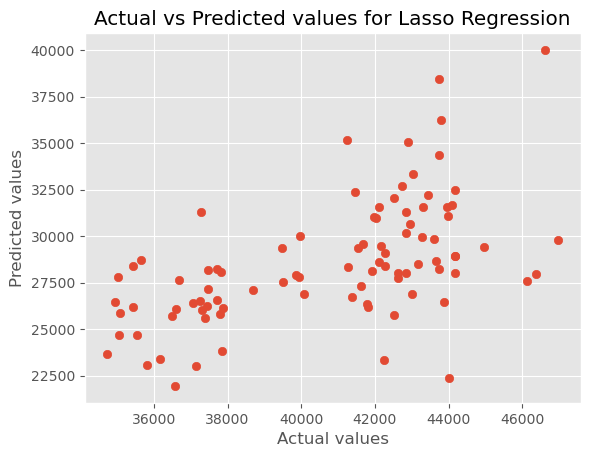

In [125]:
lasso_reg = Lasso(alpha=300)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print(f'Mean A Error: {mae}')
print(f'Mean S Error: {mse}')
print(f'R2: {R2}')


plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values for Lasso Regression')
plt.show()

#### 4.8.5 Build Model using Timestamp 

In [126]:
df_train_timestamp = df[df["Date"]<= "2023-10-31"]['Close']
df_train_timestamp = df_train_timestamp.values.reshape(-1,1)
df_test_timestamp = df[df["Date"]> "2023-10-31"]['Close']
df_test_timestamp = df_test_timestamp.values.reshape(-1, 1)
df_train_timestamp.shape

(669, 1)

In [127]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [128]:
time_step = 5
X_train_t, y_train_t = create_dataset(df_train_timestamp, time_step)
X_test_t, y_test_t = create_dataset(df_test_timestamp, time_step)

print("X_train_t: ", X_train_t.shape)
print("y_train_t: ", y_train_t.shape)
print("X_test_t: ", X_test_t.shape)
print("y_test_t", y_test_t.shape)

X_train_t:  (663, 5)
y_train_t:  (663,)
X_test_t:  (85, 5)
y_test_t (85,)


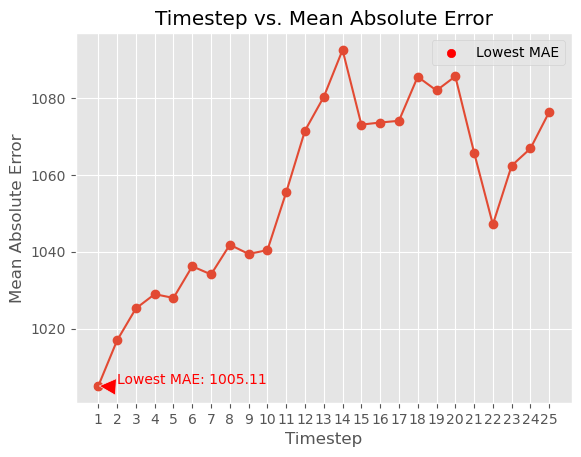

In [129]:
timesteps_list = []
mae_list =[]
for time_step in range(1, 26):
    # Create datasets
    X_train, y_train = create_dataset(df_train_timestamp, time_step)
    X_test, y_test = create_dataset(df_test_timestamp, time_step)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define XGBoost parameters
    model = Lasso(alpha = 300,max_iter=1000)
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    
    
    # Append timestep and MAE to lists
    timesteps_list.append(time_step)
    mae_list.append(mae)

# Plot timestep vs. MAE
plt.plot(timesteps_list, mae_list, marker='o')
plt.title('Timestep vs. Mean Absolute Error')
plt.xlabel('Timestep')
plt.ylabel('Mean Absolute Error')
plt.xticks(timesteps_list)
plt.grid(True)

# Find index of minimum MAE value
min_mae_index = mae_list.index(min(mae_list))

# Highlight the lowest point
plt.scatter(timesteps_list[min_mae_index], mae_list[min_mae_index], color='red', label='Lowest MAE')

# Annotate the lowest MAE value
plt.annotate(f'Lowest MAE: {min(mae_list):.2f}', 
             xy=(timesteps_list[min_mae_index], mae_list[min_mae_index]), 
             xytext=(timesteps_list[min_mae_index] + 1, mae_list[min_mae_index] + 0.5),
             arrowprops=dict(facecolor='red', shrink=0.05),
             color='red'
            )

plt.legend()
plt.show()

In [130]:
# Define the parameter grid
param_grid = {
    'alpha': [i for i in np.arange(1, 310, 10)],
}

# Initialize the Lasso regressor
mymodel_lasso = Lasso(max_iter=1000)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_t)
X_test_scaled = scaler.transform(X_test_t)
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=mymodel_lasso, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train_t)

# Get the results of the grid search
results = grid_search.cv_results_
params = results['params']
mean_scores = -results['mean_test_score']

# Extract the parameter values and scores
alpha_values = [param['alpha'] for param in params]

# Print the best parameter
best_params = grid_search.best_params_
print(grid_search)
print("Best Parameter:", best_params)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101,
                                   111, 121, 131, 141, 151, 161, 171, 181, 191,
                                   201, 211, 221, 231, 241, 251, 261, 271, 281,
                                   291, ...]},
             scoring='neg_mean_absolute_error')
Best Parameter: {'alpha': 11}


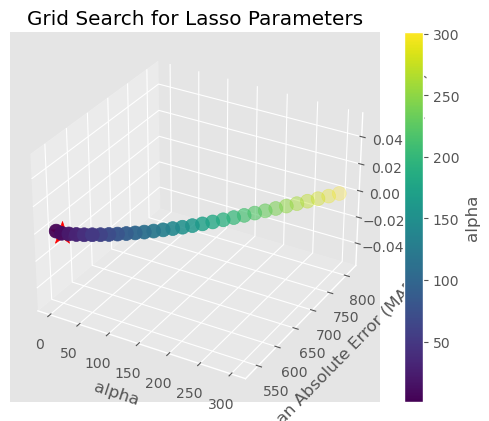

In [131]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Find the index of the best parameter
best_index = np.argmin(mean_scores)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
sc = ax.scatter(alpha_values, mean_scores, c=alpha_values, cmap='viridis', s=100)

# Highlight the point with the smallest MSE
ax.scatter(alpha_values[best_index], mean_scores[best_index], c='red', s=300, marker='*')

# Set labels and title
ax.set_xlabel('alpha')
ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_zlabel('Mean Absolute Error (MAE)')  # Added a Z label for better clarity

ax.set_title('Grid Search for Lasso Parameters')

# Add a colorbar
cbar = plt.colorbar(sc)
cbar.set_label('alpha')

plt.show()

In [132]:
my_model_lasso = Lasso(alpha=11)
                        #colsample_bytree = 0.8, 
                        #gamma= 0.5, 
                        #min_child_weight = 1, 
                        #subsample = 1.0, 
my_model_lasso.fit(X_train_scaled, y_train_t)

Lasso(alpha=11)

In [133]:
X_train_scaled.shape

(663, 5)

In [134]:
import math
# Fit the Lasso model to the training data
mymodel_lasso.fit(X_train_scaled, y_train_t)

# Make predictions using Lasso
y_pred_lasso = mymodel_lasso.predict(X_test_scaled)

# Calculate evaluation metrics for Lasso
mae_lasso = mean_absolute_error(y_test_t, y_pred_lasso)
rmse_lasso = math.sqrt(mean_squared_error(y_test_t, y_pred_lasso))
r2_lasso = r2_score(y_test_t, y_pred_lasso)

# Print the results
print("Mean Absolute Error (MAE) for Lasso: {:.2f}".format(mae_lasso))
print("Root Mean Squared Error (RMSE) for Lasso: {:.2f}".format(rmse_lasso))
print("R-squared (R^2) for Lasso: {:.2f}".format(r2_lasso))

Mean Absolute Error (MAE) for Lasso: 775.70
Root Mean Squared Error (RMSE) for Lasso: 1072.85
R-squared (R^2) for Lasso: 0.88


In [135]:
x_input = df[-30:]['Close'].values.reshape(-1, 1)

# Set the time step and prediction dates
time_step = 5
pred_dates = 10

# Create the dataset for Lasso
X_train_lasso_next_10, y_train_lasso_next_10 = create_dataset(x_input, time_step)
scaler_a = StandardScaler()
X_train_lasso_next_10_scaled = scaler_a.fit_transform(X_train_lasso_next_10)

# Make predictions using Lasso
y_pred_lasso_next_10 = my_model_lasso.predict(X_train_lasso_next_10_scaled)

# Adjust the predictions to include only the relevant time steps and prediction dates
y_pred_lasso_next_10 = y_pred_lasso_next_10[time_step:time_step + pred_dates]

# Print or use the predictions as needed
print(y_pred_lasso_next_10)

[41695.77577582 40742.74770436 27816.80985932 27777.15361913
 23930.67067671 26562.24498723 28926.42334569 27410.45189212
 21966.4156619  23276.68024405]


In [136]:
X_train_lasso_next_10

array([[44167.33203125, 44957.96875   , 42848.17578125, 44179.921875  ,
        44162.69140625],
       [44957.96875   , 42848.17578125, 44179.921875  , 44162.69140625,
        43989.1953125 ],
       [42848.17578125, 44179.921875  , 44162.69140625, 43989.1953125 ,
        43943.09765625],
       [44179.921875  , 44162.69140625, 43989.1953125 , 43943.09765625,
        46970.50390625],
       [44162.69140625, 43989.1953125 , 43943.09765625, 46970.50390625,
        46139.73046875],
       [43989.1953125 , 43943.09765625, 46970.50390625, 46139.73046875,
        46627.77734375],
       [43943.09765625, 46970.50390625, 46139.73046875, 46627.77734375,
        46368.5859375 ],
       [46970.50390625, 46139.73046875, 46627.77734375, 46368.5859375 ,
        42853.16796875],
       [46139.73046875, 46627.77734375, 46368.5859375 , 42853.16796875,
        42842.3828125 ],
       [46627.77734375, 46368.5859375 , 42853.16796875, 42842.3828125 ,
        41796.26953125],
       [46368.5859375 , 42853.

In [137]:
prediction_output = y_pred_lasso_next_10
actual_value = x_input[-10:]

In [138]:
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(actual_value, prediction_output)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(actual_value, prediction_output))))

Mean Absolute Error - MAE : 12578.83294440277
Root Mean squared Error - RMSE : 14198.805162583867


### 4.9 Ridge Regressor

#### 4.9.1 Build Model

In [139]:
X_train = train_data.drop(columns=['Close'])
y_train = train_data['Close']

X_test = test_data.drop(columns=['Close'])
y_test = test_data['Close']
X_train

,Altcoin,BIT,Bitcoin Address,Bitcoin Investment,Bitcoin Mining,Bitcoin News,Bitcoin Price,Bitcoin Wallet,Bitcoin,Block,...,DeFi,Digital Currency,Ethereum,Fiat money,Fork,Hash Rate,ICO,P2P,Private Key,Stablecoin
0,55.00,56.44,98.00,65.00,26.01,8.26,8.36,43.66,12.25,14.19,...,0.00,3.80,40.32,27.72,33.81,76.00,52.08,38.70,30.75,13.26
1,55.00,53.95,27.44,64.00,21.93,17.11,9.68,24.42,14.70,15.51,...,0.00,3.10,42.24,32.76,38.22,69.00,61.38,54.00,32.25,16.90
2,55.00,76.36,42.14,75.00,33.66,24.19,13.20,20.72,20.58,23.43,...,0.00,3.80,58.56,28.56,46.55,41.00,93.00,81.00,70.50,24.44
3,99.00,67.23,48.02,80.00,33.66,34.22,13.64,25.90,21.56,20.46,...,0.00,3.00,61.44,33.18,49.00,52.00,75.33,76.50,60.00,22.88
4,100.00,61.42,36.26,57.00,32.64,36.58,18.48,27.38,24.99,18.48,...,0.00,5.70,64.32,25.20,34.30,54.00,53.94,58.50,51.00,19.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.00,65.60,43.86,12.24,7.56,12.71,11.48,0.00,13.20,22.32,...,0.00,9.00,9.87,8.80,44.10,0.00,38.50,53.95,40.56,1.25
665,27.54,64.80,77.00,22.09,10.25,8.68,8.58,12.00,8.75,26.18,...,0.00,2.56,7.48,13.16,39.20,11.40,49.58,35.10,28.35,2.20
666,0.00,66.42,19.25,20.21,12.25,11.20,10.34,5.04,11.75,32.98,...,19.71,3.52,9.52,19.88,37.73,6.75,39.96,62.10,74.52,1.45
667,14.96,65.61,37.73,41.36,12.50,10.08,10.34,0.00,11.50,33.32,...,21.33,2.16,9.69,24.36,38.22,0.00,44.40,63.00,73.71,1.50


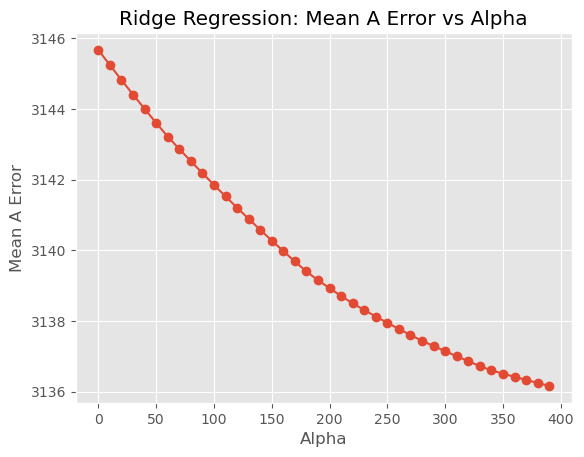

In [140]:
alphas = np.arange(0, 400, 10)  # Range from 0 to 1 with interval 0.1

# Initialize arrays to store results
mse_values = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in alphas:
    
    ridge_reg = Ridge(alpha=alpha)
    
    
    mse_fold = 0
    
    
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        ridge_reg.fit(X_train_fold, y_train_fold)
        y_pred_val = ridge_reg.predict(X_val_fold)
        
        mse_fold += mean_absolute_error(y_val_fold, y_pred_val)
    
    
    mse_values[alpha] = mse_fold / kf.get_n_splits()

plt.plot(alphas, mse_values.values(), marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean A Error')
plt.title('Ridge Regression: Mean A Error vs Alpha')
plt.show()

#### 4.9.2 Get Performance Metrics and Prediction

In [141]:
min_value = min(mse_values.values())

# Find the keys associated with the minimum value(s)
min_keys = [key for key, value in mse_values.items() if value == min_value]

Mean A Error: 12202.548754642403
Mean S Error: 158635975.26427245
R2: -14.009114001409522


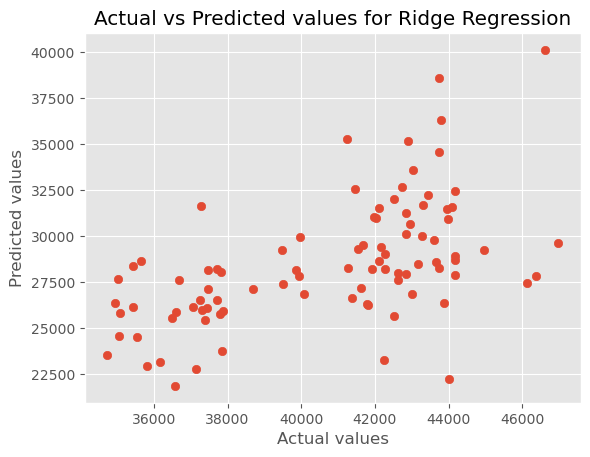

In [142]:
ridge_reg = Ridge(alpha=390)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print(f'Mean A Error: {mae}')
print(f'Mean S Error: {mse}')
print(f'R2: {R2}')

plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values for Ridge Regression')
plt.show()

#### 4.9.3 Using Timestamp

In [143]:
param_grid = {
    'alpha': [i for i in np.arange(1, 310, 10)],
}

# Initialize the Lasso regressor
mymodel_ridge = Ridge(max_iter=1000)


scaler = StandardScaler()
X_train, y_train = create_dataset(df_train_timestamp, time_step)
X_test, y_test = create_dataset(df_test_timestamp, time_step)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=mymodel_ridge, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

# Get the results of the grid search
results = grid_search.cv_results_
params = results['params']
mean_scores = -results['mean_test_score']

# Extract the parameter values and scores
alpha_values = [param['alpha'] for param in params]

# Print the best parameter
best_params = grid_search.best_params_
print(grid_search)
print("Best Parameter:", best_params)

GridSearchCV(cv=5, estimator=Ridge(max_iter=1000),
             param_grid={'alpha': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101,
                                   111, 121, 131, 141, 151, 161, 171, 181, 191,
                                   201, 211, 221, 231, 241, 251, 261, 271, 281,
                                   291, ...]},
             scoring='neg_mean_absolute_error')
Best Parameter: {'alpha': 1}


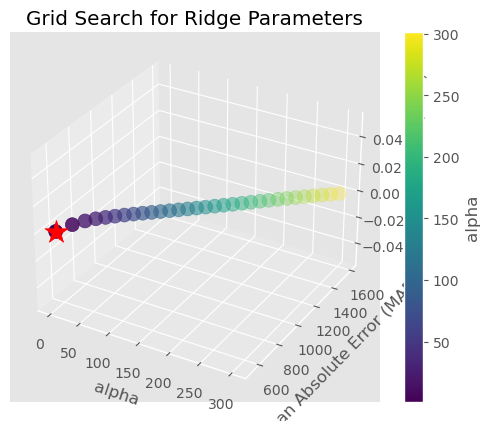

In [144]:
best_index = np.argmin(mean_scores)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
sc = ax.scatter(alpha_values, mean_scores, c=alpha_values, cmap='viridis', s=100)

# Highlight the point with the smallest MSE
ax.scatter(alpha_values[best_index], mean_scores[best_index], c='red', s=300, marker='*')

# Set labels and title
ax.set_xlabel('alpha')
ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_zlabel('Mean Absolute Error (MAE)')  # Added a Z label for better clarity

ax.set_title('Grid Search for Ridge Parameters')

# Add a colorbar
cbar = plt.colorbar(sc)
cbar.set_label('alpha')

plt.show()

In [145]:
my_model_ridge = Ridge(alpha=1)
                        #colsample_bytree = 0.8, 
                        #gamma= 0.5, 
                        #min_child_weight = 1, 
                        #subsample = 1.0, 
my_model_ridge.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [146]:
mymodel_ridge = Ridge(alpha=1)

# Fit the Lasso model to the training data
mymodel_ridge.fit(X_train_scaled, y_train)

# Make predictions using Lasso
y_pred_ridge = mymodel_ridge.predict(X_test_scaled)

# Calculate evaluation metrics for Lasso
mae_r = mean_absolute_error(y_test, y_pred_ridge)
rmse_r = math.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_r = r2_score(y_test, y_pred_ridge)

# Print the results
print("Mean Absolute Error (MAE) for Ridge: {:.2f}".format(mae_r))
print("Root Mean Squared Error (RMSE) for Ridge: {:.2f}".format(rmse_r))
print("R-squared (R^2) for Ridge: {:.2f}".format(r2_r))

Mean Absolute Error (MAE) for Ridge: 766.89
Root Mean Squared Error (RMSE) for Ridge: 1065.08
R-squared (R^2) for Ridge: 0.88


In [147]:
x_input = df[-30:]['Close'].values.reshape(-1, 1)

# Set the time step and prediction dates
time_step = 5
pred_dates = 10

# Create the dataset for Lasso
X_train_ridge_next_10, y_train_ridge_next_10 = create_dataset(x_input, time_step)
X_train_ridge_next_10_scaled = scaler.fit_transform(X_train_ridge_next_10)
X_test_ridge_next_10_scaled = scaler.transform(X_test_scaled)
# Make predictions using Lasso
y_pred_ridge_next_10 = my_model_ridge.predict(X_train_ridge_next_10_scaled)

# Adjust the predictions to include only the relevant time steps and prediction dates
y_pred_ridge_next_10 = y_pred_ridge_next_10[time_step:time_step + pred_dates]

# Print or use the predictions as needed
print(y_pred_ridge_next_10)

[42069.68328343 40596.99009529 29074.08343813 27455.94898179
 23587.68016266 26362.87938353 28554.5899113  27760.07758764
 22514.78207076 22940.79443171]


In [148]:
prediction_output = y_pred_ridge_next_10
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(actual_value, prediction_output)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(actual_value, prediction_output))))

Mean Absolute Error - MAE : 12543.24936612091
Root Mean squared Error - RMSE : 14151.404785038936


### 4.10 Random Forest

#### 4.10.1 Build Model, Get Performance Metrics and Prediction

In [149]:
param_grid = {
    'n_estimators': [i for i in np.arange(1, 310, 10)],
}

# Initialize the Lasso regressor
mymodel_r = RandomForestRegressor()


scaler = StandardScaler()
X_train, y_train = create_dataset(df_train_timestamp, time_step)
X_test, y_test = create_dataset(df_test_timestamp, time_step)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=mymodel_r, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

# Get the results of the grid search
results = grid_search.cv_results_
params = results['params']
mean_scores = -results['mean_test_score']

# Extract the parameter values and scores
alpha_values = [param['n_estimators'] for param in params]

# Print the best parameter
best_params = grid_search.best_params_
print(grid_search)
print("Best Parameter:", best_params)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91,
                                          101, 111, 121, 131, 141, 151, 161,
                                          171, 181, 191, 201, 211, 221, 231,
                                          241, 251, 261, 271, 281, 291, ...]},
             scoring='neg_mean_absolute_error')
Best Parameter: {'n_estimators': 41}


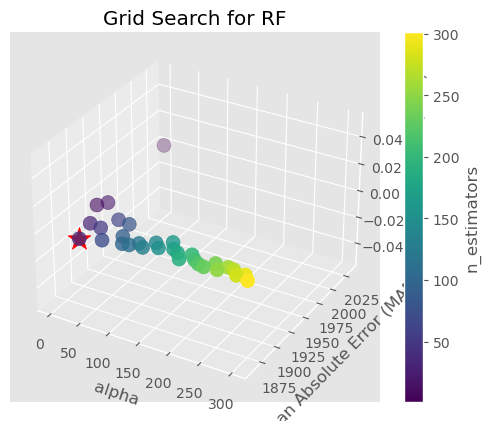

In [150]:
best_index = np.argmin(mean_scores)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
sc = ax.scatter(alpha_values, mean_scores, c=alpha_values, cmap='viridis', s=100)

# Highlight the point with the smallest MSE
ax.scatter(alpha_values[best_index], mean_scores[best_index], c='red', s=300, marker='*')

# Set labels and title
ax.set_xlabel('alpha')
ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_zlabel('Mean Absolute Error (MAE)')  # Added a Z label for better clarity

ax.set_title('Grid Search for RF')

# Add a colorbar
cbar = plt.colorbar(sc)
cbar.set_label('n_estimators')

plt.show()

In [151]:
my_model_rf = RandomForestRegressor(n_estimators=171)
                        #colsample_bytree = 0.8, 
                        #gamma= 0.5, 
                        #min_child_weight = 1, 
                        #subsample = 1.0,
my_model_rf.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=171)

In [152]:
mymodel_rf = RandomForestRegressor(n_estimators=171)

# Fit the Lasso model to the training data
mymodel_rf.fit(X_train_scaled, y_train)

# Make predictions using Lasso
y_pred_rf = mymodel_rf.predict(X_test_scaled)

# Calculate evaluation metrics for Lasso
mae_r = mean_absolute_error(y_test, y_pred_rf)
rmse_r = math.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_r = r2_score(y_test, y_pred_rf)

# Print the results
print("Mean Absolute Error (MAE) for Lasso: {:.2f}".format(mae_r))
print("Root Mean Squared Error (RMSE) for Lasso: {:.2f}".format(rmse_r))
print("R-squared (R^2) for Lasso: {:.2f}".format(r2_r))

Mean Absolute Error (MAE) for Lasso: 1066.38
Root Mean Squared Error (RMSE) for Lasso: 1352.11
R-squared (R^2) for Lasso: 0.80


In [153]:
x_input = df[-30:]['Close'].values.reshape(-1, 1)

# Set the time step and prediction dates
time_step = 5
pred_dates = 10

# Create the datase
X_train_rf_next_10, y_train_rf_next_10 = create_dataset(x_input, time_step)
X_train_rf_next_10_scaled = scaler.fit_transform(X_train_rf_next_10)
X_test_rf_next_10_scaled = scaler.transform(X_test_scaled)
# Make predictions 
y_pred_rf_next_10 = my_model_rf.predict(X_train_rf_next_10_scaled)

# Adjust the predictions to include only the relevant time steps and prediction dates
y_pred_rf_next_10 = y_pred_rf_next_10[time_step:time_step + pred_dates]

# Print or use the predictions as needed
print(y_pred_rf_next_10)

[41280.0527458  41433.77332328 27886.20550073 27483.57563505
 23444.88794088 25245.40389711 29161.70795641 27381.08264803
 22013.04515031 22740.42141813]


In [154]:
prediction_output = y_pred_rf_next_10
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(actual_value, prediction_output)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(actual_value, prediction_output))))

Mean Absolute Error - MAE : 12890.561699332968
Root Mean squared Error - RMSE : 14476.677770139833
